# Chapter: Feedforward Neural Networks


# Topic: FFNN modeling of Combined Cycle Power Plant

In [35]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [36]:
# read data
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

In [37]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [38]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [39]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Define FFNN model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [40]:
# import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [41]:
# model function
def FFNN_model(hidden_layers, layer_size, regularizationValue, learningRate):
    model = Sequential()
    model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal', input_shape=(4,)))
    
    for _ in range(hidden_layers-1):
        model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal'))
        
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learningRate))
    
    return model

In [42]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                 KerasRegressor wrapper and gridSearchCV
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [43]:
# KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=FFNN_model, epochs=25, batch_size=50)

In [44]:
# gridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid={
    "hidden_layers":[1, 2],
    "layer_size":np.arange(1,10),
    "regularizationValue": [0.001, 0.01, 0.1],
    "learningRate":[0.05, 0.01, 0.1]
}

grid_searchcv = GridSearchCV(model, param_grid)
grid_searchcv.fit(X_est_scaled, y_est_scaled, validation_data=(X_val_scaled, y_val_scaled))

print("The best parameters obtained are:", grid_searchcv.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5013 - val_loss: 0.2799
Epoch 2/25
72/72 [==============================] - 0s 900us/step - loss: 0.1731 - val_loss: 0.0884
Epoch 3/25
72/72 [==============================] - 0s 900us/step - loss: 0.0782 - val_loss: 0.0759
Epoch 4/25
72/72 [==============================] - 0s 887us/step - loss: 0.0767 - val_loss: 0.0733
Epoch 5/25
72/72 [==============================] - 0s 900us/step - loss: 0.0748 - val_loss: 0.0709
Epoch 6/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0775 - val_loss: 0.0745
Epoch 7/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0730 - val_loss: 0.1083
Epoch 8/25
72/72 [==============================] - 0s 886us/step - loss: 0.0767 - val_loss: 0.0742
Epoch 9/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0744 - val_loss: 0.0714
Epoch 10/25
72/72 [==============================] - 0s 914us/step - loss: 0.0743 - val_loss: 0.0741
Epoch 1

72/72 [==============================] - 0s 886us/step - loss: 0.0894 - val_loss: 0.0983
Epoch 4/25
72/72 [==============================] - 0s 868us/step - loss: 0.0873 - val_loss: 0.1061
Epoch 5/25
72/72 [==============================] - 0s 748us/step - loss: 0.0860 - val_loss: 0.0811
Epoch 6/25
72/72 [==============================] - 0s 831us/step - loss: 0.0849 - val_loss: 0.0803
Epoch 7/25
72/72 [==============================] - 0s 837us/step - loss: 0.0874 - val_loss: 0.0802
Epoch 8/25
72/72 [==============================] - 0s 859us/step - loss: 0.0872 - val_loss: 0.0867
Epoch 9/25
72/72 [==============================] - 0s 859us/step - loss: 0.0856 - val_loss: 0.0849
Epoch 10/25
72/72 [==============================] - 0s 803us/step - loss: 0.0877 - val_loss: 0.0947
Epoch 11/25
72/72 [==============================] - 0s 803us/step - loss: 0.0875 - val_loss: 0.0988
Epoch 12/25
72/72 [==============================] - 0s 831us/step - loss: 0.0916 - val_loss: 0.0855
Epoch 13

72/72 [==============================] - 0s 873us/step - loss: 0.1204 - val_loss: 0.1241
Epoch 8/25
72/72 [==============================] - 0s 859us/step - loss: 0.1255 - val_loss: 0.1194
Epoch 9/25
72/72 [==============================] - 0s 859us/step - loss: 0.1218 - val_loss: 0.1168
Epoch 10/25
72/72 [==============================] - 0s 862us/step - loss: 0.1156 - val_loss: 0.1243
Epoch 11/25
72/72 [==============================] - 0s 886us/step - loss: 0.1233 - val_loss: 0.1110
Epoch 12/25
72/72 [==============================] - 0s 873us/step - loss: 0.1152 - val_loss: 0.1368
Epoch 13/25
72/72 [==============================] - 0s 872us/step - loss: 0.1187 - val_loss: 0.1116
Epoch 14/25
72/72 [==============================] - 0s 887us/step - loss: 0.1207 - val_loss: 0.1066
Epoch 15/25
72/72 [==============================] - 0s 831us/step - loss: 0.1127 - val_loss: 0.1078
Epoch 16/25
72/72 [==============================] - 0s 849us/step - loss: 0.1187 - val_loss: 0.1123
Epoc

72/72 [==============================] - 0s 817us/step - loss: 0.0650 - val_loss: 0.0632
Epoch 12/25
72/72 [==============================] - 0s 803us/step - loss: 0.0650 - val_loss: 0.0633
Epoch 13/25
72/72 [==============================] - 0s 831us/step - loss: 0.0652 - val_loss: 0.0638
Epoch 14/25
72/72 [==============================] - 0s 831us/step - loss: 0.0651 - val_loss: 0.0625
Epoch 15/25
72/72 [==============================] - 0s 873us/step - loss: 0.0650 - val_loss: 0.0647
Epoch 16/25
72/72 [==============================] - 0s 886us/step - loss: 0.0650 - val_loss: 0.0649
Epoch 17/25
72/72 [==============================] - 0s 847us/step - loss: 0.0658 - val_loss: 0.0628
Epoch 18/25
72/72 [==============================] - 0s 873us/step - loss: 0.0646 - val_loss: 0.0632
Epoch 19/25
72/72 [==============================] - 0s 831us/step - loss: 0.0657 - val_loss: 0.0662
Epoch 20/25
72/72 [==============================] - 0s 817us/step - loss: 0.0654 - val_loss: 0.0635
Ep

72/72 [==============================] - 0s 803us/step - loss: 0.0825 - val_loss: 0.0805
Epoch 16/25
72/72 [==============================] - 0s 844us/step - loss: 0.0820 - val_loss: 0.0809
Epoch 17/25
72/72 [==============================] - 0s 734us/step - loss: 0.0816 - val_loss: 0.0835
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.0818 - val_loss: 0.0843
Epoch 19/25
72/72 [==============================] - 0s 831us/step - loss: 0.0816 - val_loss: 0.0822
Epoch 20/25
72/72 [==============================] - 0s 818us/step - loss: 0.0816 - val_loss: 0.0814
Epoch 21/25
72/72 [==============================] - 0s 845us/step - loss: 0.0806 - val_loss: 0.0805
Epoch 22/25
72/72 [==============================] - 0s 817us/step - loss: 0.0807 - val_loss: 0.0794
Epoch 23/25
72/72 [==============================] - 0s 831us/step - loss: 0.0813 - val_loss: 0.0832
Epoch 24/25
72/72 [==============================] - 0s 831us/step - loss: 0.0814 - val_loss: 0.0800
Ep

72/72 [==============================] - 0s 748us/step - loss: 1.0307 - val_loss: 1.0300
Epoch 13/25
72/72 [==============================] - 0s 803us/step - loss: 1.0147 - val_loss: 1.0146
Epoch 14/25
72/72 [==============================] - 0s 845us/step - loss: 1.0022 - val_loss: 1.0062
Epoch 15/25
72/72 [==============================] - 0s 789us/step - loss: 0.9985 - val_loss: 1.0059
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.9986 - val_loss: 1.0065
Epoch 17/25
72/72 [==============================] - 0s 867us/step - loss: 0.9983 - val_loss: 1.0060
Epoch 18/25
72/72 [==============================] - 0s 831us/step - loss: 0.9989 - val_loss: 1.0063
Epoch 19/25
72/72 [==============================] - 0s 797us/step - loss: 0.9985 - val_loss: 1.0060
Epoch 20/25
72/72 [==============================] - 0s 831us/step - loss: 0.9984 - val_loss: 1.0060
Epoch 21/25
72/72 [==============================] - 0s 873us/step - loss: 0.9986 - val_loss: 1.0059
Ep

Epoch 14/25
72/72 [==============================] - 0s 761us/step - loss: 0.0827 - val_loss: 0.0718
Epoch 15/25
72/72 [==============================] - 0s 790us/step - loss: 0.0806 - val_loss: 0.0742
Epoch 16/25
72/72 [==============================] - 0s 775us/step - loss: 0.0814 - val_loss: 0.0711
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0777 - val_loss: 0.0724
Epoch 18/25
72/72 [==============================] - 0s 789us/step - loss: 0.0789 - val_loss: 0.0783
Epoch 19/25
72/72 [==============================] - 0s 734us/step - loss: 0.0799 - val_loss: 0.0787
Epoch 20/25
72/72 [==============================] - 0s 818us/step - loss: 0.0767 - val_loss: 0.0759
Epoch 21/25
72/72 [==============================] - 0s 858us/step - loss: 0.0814 - val_loss: 0.0728
Epoch 22/25
72/72 [==============================] - 0s 845us/step - loss: 0.0764 - val_loss: 0.0878
Epoch 23/25
72/72 [==============================] - 0s 873us/step - loss: 0.0861 - val_los

72/72 [==============================] - 0s 859us/step - loss: 0.0821 - val_loss: 0.0816
Epoch 17/25
72/72 [==============================] - 0s 845us/step - loss: 0.0809 - val_loss: 0.0758
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.0806 - val_loss: 0.0783
Epoch 19/25
72/72 [==============================] - 0s 803us/step - loss: 0.0854 - val_loss: 0.0808
Epoch 20/25
72/72 [==============================] - 0s 845us/step - loss: 0.0900 - val_loss: 0.0799
Epoch 21/25
72/72 [==============================] - 0s 778us/step - loss: 0.0841 - val_loss: 0.0749
Epoch 22/25
72/72 [==============================] - 0s 872us/step - loss: 0.0793 - val_loss: 0.1012
Epoch 23/25
72/72 [==============================] - 0s 825us/step - loss: 0.0835 - val_loss: 0.0769
Epoch 24/25
72/72 [==============================] - 0s 764us/step - loss: 0.0829 - val_loss: 0.0883
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.0819
Epoch 1/25
72/72 [===

Epoch 16/25
72/72 [==============================] - 0s 817us/step - loss: 0.1314 - val_loss: 0.1260
Epoch 17/25
72/72 [==============================] - 0s 790us/step - loss: 0.1311 - val_loss: 0.1297
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.1312 - val_loss: 0.1329
Epoch 19/25
72/72 [==============================] - 0s 776us/step - loss: 0.1230 - val_loss: 0.1170
Epoch 20/25
72/72 [==============================] - 0s 830us/step - loss: 0.1286 - val_loss: 0.1586
Epoch 21/25
72/72 [==============================] - 0s 720us/step - loss: 0.1261 - val_loss: 0.1526
Epoch 22/25
72/72 [==============================] - 0s 755us/step - loss: 0.1314 - val_loss: 0.1170
Epoch 23/25
72/72 [==============================] - 0s 720us/step - loss: 0.1280 - val_loss: 0.1123
Epoch 24/25
72/72 [==============================] - 0s 762us/step - loss: 0.1247 - val_loss: 0.1323
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1168
Epoch 1/2

72/72 [==============================] - 0s 804us/step - loss: 0.0713 - val_loss: 0.0715
Epoch 19/25
72/72 [==============================] - 0s 762us/step - loss: 0.0672 - val_loss: 0.0647
Epoch 20/25
72/72 [==============================] - 0s 767us/step - loss: 0.0687 - val_loss: 0.0674
Epoch 21/25
72/72 [==============================] - 0s 761us/step - loss: 0.0674 - val_loss: 0.0698
Epoch 22/25
72/72 [==============================] - 0s 817us/step - loss: 0.0679 - val_loss: 0.0651
Epoch 23/25
72/72 [==============================] - 0s 817us/step - loss: 0.0673 - val_loss: 0.0724
Epoch 24/25
72/72 [==============================] - 0s 790us/step - loss: 0.0664 - val_loss: 0.0658
Epoch 25/25
36/36 [==============================] - 0s 470us/step - loss: 0.0729
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2123 - val_loss: 0.1114
Epoch 2/25
72/72 [==============================] - 0s 859us/step - loss: 0.0796 - val_loss: 0.0661
Epoch 3/25
72/72 [=======

72/72 [==============================] - 0s 761us/step - loss: 0.0777 - val_loss: 0.0748
Epoch 23/25
72/72 [==============================] - 0s 790us/step - loss: 0.0802 - val_loss: 0.0810
Epoch 24/25
72/72 [==============================] - 0s 776us/step - loss: 0.0785 - val_loss: 0.0759
Epoch 25/25
36/36 [==============================] - 0s 471us/step - loss: 0.0804
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.1640 - val_loss: 0.1041
Epoch 2/25
72/72 [==============================] - 0s 790us/step - loss: 0.0961 - val_loss: 0.0899
Epoch 3/25
72/72 [==============================] - 0s 776us/step - loss: 0.0917 - val_loss: 0.0924
Epoch 4/25
72/72 [==============================] - 0s 803us/step - loss: 0.0947 - val_loss: 0.0882
Epoch 5/25
72/72 [==============================] - 0s 831us/step - loss: 0.0879 - val_loss: 0.0787
Epoch 6/25
72/72 [==============================] - 0s 845us/step - loss: 0.0869 - val_loss: 0.0864
Epoch 7/25
72/72 [===========

Epoch 24/25
72/72 [==============================] - 0s 789us/step - loss: 0.1140 - val_loss: 0.1110
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.1024
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.1403 - val_loss: 1.0196
Epoch 2/25
72/72 [==============================] - 0s 762us/step - loss: 1.0173 - val_loss: 1.0126
Epoch 3/25
72/72 [==============================] - 0s 831us/step - loss: 1.0200 - val_loss: 1.0113
Epoch 4/25
72/72 [==============================] - 0s 806us/step - loss: 1.0192 - val_loss: 1.0210
Epoch 5/25
72/72 [==============================] - 0s 748us/step - loss: 1.0161 - val_loss: 1.0089
Epoch 6/25
72/72 [==============================] - 0s 803us/step - loss: 1.0144 - val_loss: 1.0288
Epoch 7/25
72/72 [==============================] - 0s 790us/step - loss: 1.0150 - val_loss: 1.0093
Epoch 8/25
72/72 [==============================] - 0s 776us/step - loss: 1.0162 - val_loss: 1.0170
Epoch 9/25
72/72 [=

72/72 [==============================] - 0s 748us/step - loss: 0.3479 - val_loss: 0.2812
Epoch 3/25
72/72 [==============================] - 0s 730us/step - loss: 0.2303 - val_loss: 0.1986
Epoch 4/25
72/72 [==============================] - 0s 734us/step - loss: 0.1698 - val_loss: 0.1523
Epoch 5/25
72/72 [==============================] - 0s 734us/step - loss: 0.1375 - val_loss: 0.1259
Epoch 6/25
72/72 [==============================] - 0s 720us/step - loss: 0.1181 - val_loss: 0.1100
Epoch 7/25
72/72 [==============================] - 0s 679us/step - loss: 0.1063 - val_loss: 0.0995
Epoch 8/25
72/72 [==============================] - 0s 748us/step - loss: 0.0986 - val_loss: 0.0925
Epoch 9/25
72/72 [==============================] - 0s 734us/step - loss: 0.0930 - val_loss: 0.0873
Epoch 10/25
72/72 [==============================] - 0s 734us/step - loss: 0.0886 - val_loss: 0.0869
Epoch 11/25
72/72 [==============================] - 0s 734us/step - loss: 0.0859 - val_loss: 0.0805
Epoch 12/

72/72 [==============================] - 0s 817us/step - loss: 0.1422 - val_loss: 0.1184
Epoch 5/25
72/72 [==============================] - 0s 790us/step - loss: 0.1098 - val_loss: 0.0990
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.0959 - val_loss: 0.0887
Epoch 7/25
72/72 [==============================] - 0s 762us/step - loss: 0.0888 - val_loss: 0.0850
Epoch 8/25
72/72 [==============================] - 0s 776us/step - loss: 0.0861 - val_loss: 0.0829
Epoch 9/25
72/72 [==============================] - 0s 817us/step - loss: 0.0847 - val_loss: 0.0823
Epoch 10/25
72/72 [==============================] - 0s 831us/step - loss: 0.0834 - val_loss: 0.0797
Epoch 11/25
72/72 [==============================] - 0s 776us/step - loss: 0.0833 - val_loss: 0.0812
Epoch 12/25
72/72 [==============================] - 0s 791us/step - loss: 0.0820 - val_loss: 0.0790
Epoch 13/25
72/72 [==============================] - 0s 831us/step - loss: 0.0817 - val_loss: 0.0785
Epoch 1

72/72 [==============================] - 0s 859us/step - loss: 0.1417 - val_loss: 0.1430
Epoch 9/25
72/72 [==============================] - 0s 803us/step - loss: 0.1385 - val_loss: 0.1339
Epoch 10/25
72/72 [==============================] - 0s 790us/step - loss: 0.1338 - val_loss: 0.1322
Epoch 11/25
72/72 [==============================] - 0s 790us/step - loss: 0.1308 - val_loss: 0.1294
Epoch 12/25
72/72 [==============================] - 0s 817us/step - loss: 0.1281 - val_loss: 0.1293
Epoch 13/25
72/72 [==============================] - 0s 831us/step - loss: 0.1257 - val_loss: 0.1251
Epoch 14/25
72/72 [==============================] - 0s 790us/step - loss: 0.1243 - val_loss: 0.1245
Epoch 15/25
72/72 [==============================] - 0s 873us/step - loss: 0.1237 - val_loss: 0.1199
Epoch 16/25
72/72 [==============================] - 0s 859us/step - loss: 0.1211 - val_loss: 0.1203
Epoch 17/25
72/72 [==============================] - 0s 859us/step - loss: 0.1203 - val_loss: 0.1187
Epo

72/72 [==============================] - 0s 914us/step - loss: 0.0809 - val_loss: 0.0764
Epoch 11/25
72/72 [==============================] - 0s 928us/step - loss: 0.0834 - val_loss: 0.0789
Epoch 12/25
72/72 [==============================] - 0s 914us/step - loss: 0.0800 - val_loss: 0.0762
Epoch 13/25
72/72 [==============================] - 0s 803us/step - loss: 0.0819 - val_loss: 0.0721
Epoch 14/25
72/72 [==============================] - 0s 734us/step - loss: 0.0807 - val_loss: 0.0902
Epoch 15/25
72/72 [==============================] - 0s 831us/step - loss: 0.0845 - val_loss: 0.0726
Epoch 16/25
72/72 [==============================] - 0s 803us/step - loss: 0.0801 - val_loss: 0.0737
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0798 - val_loss: 0.0747
Epoch 18/25
72/72 [==============================] - 0s 790us/step - loss: 0.0777 - val_loss: 0.0739
Epoch 19/25
72/72 [==============================] - 0s 734us/step - loss: 0.0797 - val_loss: 0.0751
Ep

72/72 [==============================] - 0s 831us/step - loss: 0.0821 - val_loss: 0.0742
Epoch 15/25
72/72 [==============================] - 0s 817us/step - loss: 0.0856 - val_loss: 0.0801
Epoch 16/25
72/72 [==============================] - 0s 803us/step - loss: 0.0814 - val_loss: 0.0765
Epoch 17/25
72/72 [==============================] - 0s 873us/step - loss: 0.0861 - val_loss: 0.0761
Epoch 18/25
72/72 [==============================] - 0s 886us/step - loss: 0.0853 - val_loss: 0.0921
Epoch 19/25
72/72 [==============================] - 0s 831us/step - loss: 0.0870 - val_loss: 0.0790
Epoch 20/25
72/72 [==============================] - 0s 818us/step - loss: 0.0844 - val_loss: 0.0789
Epoch 21/25
72/72 [==============================] - 0s 859us/step - loss: 0.0878 - val_loss: 0.0757
Epoch 22/25
72/72 [==============================] - 0s 835us/step - loss: 0.0949 - val_loss: 0.0830
Epoch 23/25
72/72 [==============================] - 0s 859us/step - loss: 0.0855 - val_loss: 0.0798
Ep

72/72 [==============================] - 0s 776us/step - loss: 0.1194 - val_loss: 0.1244
Epoch 19/25
72/72 [==============================] - 0s 762us/step - loss: 0.1222 - val_loss: 0.1045
Epoch 20/25
72/72 [==============================] - 0s 803us/step - loss: 0.1293 - val_loss: 0.1649
Epoch 21/25
72/72 [==============================] - 0s 776us/step - loss: 0.1361 - val_loss: 0.1361
Epoch 22/25
72/72 [==============================] - 0s 790us/step - loss: 0.1183 - val_loss: 0.1207
Epoch 23/25
72/72 [==============================] - 0s 776us/step - loss: 0.1220 - val_loss: 0.1086
Epoch 24/25
72/72 [==============================] - 0s 831us/step - loss: 0.1177 - val_loss: 0.1322
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1343
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5533 - val_loss: 0.1563
Epoch 2/25
72/72 [==============================] - 0s 790us/step - loss: 0.1514 - val_loss: 0.1602
Epoch 3/25
72/72 [=======

72/72 [==============================] - 0s 748us/step - loss: 0.0689 - val_loss: 0.0657
Epoch 21/25
72/72 [==============================] - 0s 817us/step - loss: 0.0675 - val_loss: 0.0707
Epoch 22/25
72/72 [==============================] - 0s 817us/step - loss: 0.0684 - val_loss: 0.0662
Epoch 23/25
72/72 [==============================] - 0s 734us/step - loss: 0.0681 - val_loss: 0.0646
Epoch 24/25
72/72 [==============================] - 0s 789us/step - loss: 0.0668 - val_loss: 0.0656
Epoch 25/25
36/36 [==============================] - 0s 444us/step - loss: 0.0715
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.8401 - val_loss: 0.2043
Epoch 2/25
72/72 [==============================] - 0s 817us/step - loss: 0.1243 - val_loss: 0.0911
Epoch 3/25
72/72 [==============================] - 0s 790us/step - loss: 0.0881 - val_loss: 0.0802
Epoch 4/25
72/72 [==============================] - 0s 790us/step - loss: 0.0813 - val_loss: 0.0745
Epoch 5/25
72/72 [=========

72/72 [==============================] - 0s 1ms/step - loss: 0.0836 - val_loss: 0.0882
Epoch 25/25
36/36 [==============================] - 0s 471us/step - loss: 0.0811
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.7954 - val_loss: 0.1832
Epoch 2/25
72/72 [==============================] - 0s 776us/step - loss: 0.1402 - val_loss: 0.1123
Epoch 3/25
72/72 [==============================] - 0s 859us/step - loss: 0.1033 - val_loss: 0.0933
Epoch 4/25
72/72 [==============================] - 0s 803us/step - loss: 0.0933 - val_loss: 0.0905
Epoch 5/25
72/72 [==============================] - 0s 800us/step - loss: 0.0887 - val_loss: 0.0834
Epoch 6/25
72/72 [==============================] - 0s 748us/step - loss: 0.0841 - val_loss: 0.0828
Epoch 7/25
72/72 [==============================] - 0s 799us/step - loss: 0.0853 - val_loss: 0.0838
Epoch 8/25
72/72 [==============================] - 0s 803us/step - loss: 0.0838 - val_loss: 0.1000
Epoch 9/25
72/72 [===============

Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5287 - val_loss: 0.1730
Epoch 2/25
72/72 [==============================] - 0s 900us/step - loss: 0.1482 - val_loss: 0.1381
Epoch 3/25
72/72 [==============================] - 0s 803us/step - loss: 0.1318 - val_loss: 0.1344
Epoch 4/25
72/72 [==============================] - 0s 873us/step - loss: 0.1273 - val_loss: 0.1206
Epoch 5/25
72/72 [==============================] - 0s 831us/step - loss: 0.1280 - val_loss: 0.1616
Epoch 6/25
72/72 [==============================] - 0s 845us/step - loss: 0.1266 - val_loss: 0.1111
Epoch 7/25
72/72 [==============================] - 0s 803us/step - loss: 0.1181 - val_loss: 0.1144
Epoch 8/25
72/72 [==============================] - 0s 859us/step - loss: 0.1154 - val_loss: 0.1164
Epoch 9/25
72/72 [==============================] - 0s 817us/step - loss: 0.1136 - val_loss: 0.1094
Epoch 10/25
72/72 [==============================] - 0s 845us/step - loss: 0.1110 - val_loss: 0.1067
E

72/72 [==============================] - 0s 775us/step - loss: 0.0853 - val_loss: 0.0796
Epoch 6/25
72/72 [==============================] - 0s 762us/step - loss: 0.0797 - val_loss: 0.0763
Epoch 7/25
72/72 [==============================] - 0s 803us/step - loss: 0.0771 - val_loss: 0.0741
Epoch 8/25
72/72 [==============================] - 0s 748us/step - loss: 0.0752 - val_loss: 0.0755
Epoch 9/25
72/72 [==============================] - 0s 734us/step - loss: 0.0746 - val_loss: 0.0739
Epoch 10/25
72/72 [==============================] - 0s 776us/step - loss: 0.0732 - val_loss: 0.0710
Epoch 11/25
72/72 [==============================] - 0s 762us/step - loss: 0.0737 - val_loss: 0.0699
Epoch 12/25
72/72 [==============================] - 0s 762us/step - loss: 0.0744 - val_loss: 0.0710
Epoch 13/25
72/72 [==============================] - 0s 747us/step - loss: 0.0727 - val_loss: 0.0696
Epoch 14/25
72/72 [==============================] - 0s 831us/step - loss: 0.0726 - val_loss: 0.0697
Epoch 

72/72 [==============================] - 0s 847us/step - loss: 0.1129 - val_loss: 0.1084
Epoch 8/25
72/72 [==============================] - 0s 858us/step - loss: 0.1069 - val_loss: 0.1035
Epoch 9/25
72/72 [==============================] - 0s 776us/step - loss: 0.1032 - val_loss: 0.0997
Epoch 10/25
72/72 [==============================] - 0s 735us/step - loss: 0.1001 - val_loss: 0.0964
Epoch 11/25
72/72 [==============================] - 0s 831us/step - loss: 0.0972 - val_loss: 0.0930
Epoch 12/25
72/72 [==============================] - 0s 831us/step - loss: 0.0939 - val_loss: 0.0912
Epoch 13/25
72/72 [==============================] - 0s 776us/step - loss: 0.0920 - val_loss: 0.0915
Epoch 14/25
72/72 [==============================] - 0s 776us/step - loss: 0.0887 - val_loss: 0.0915
Epoch 15/25
72/72 [==============================] - 0s 748us/step - loss: 0.0867 - val_loss: 0.0858
Epoch 16/25
72/72 [==============================] - 0s 803us/step - loss: 0.0842 - val_loss: 0.0825
Epoc

72/72 [==============================] - 0s 776us/step - loss: 0.1263 - val_loss: 0.1212
Epoch 12/25
72/72 [==============================] - 0s 803us/step - loss: 0.1231 - val_loss: 0.1218
Epoch 13/25
72/72 [==============================] - 0s 789us/step - loss: 0.1223 - val_loss: 0.1170
Epoch 14/25
72/72 [==============================] - 0s 803us/step - loss: 0.1192 - val_loss: 0.1154
Epoch 15/25
72/72 [==============================] - 0s 776us/step - loss: 0.1166 - val_loss: 0.1147
Epoch 16/25
72/72 [==============================] - 0s 831us/step - loss: 0.1145 - val_loss: 0.1123
Epoch 17/25
72/72 [==============================] - 0s 817us/step - loss: 0.1148 - val_loss: 0.1114
Epoch 18/25
72/72 [==============================] - 0s 817us/step - loss: 0.1141 - val_loss: 0.1114
Epoch 19/25
72/72 [==============================] - 0s 803us/step - loss: 0.1116 - val_loss: 0.1106
Epoch 20/25
72/72 [==============================] - 0s 762us/step - loss: 0.1102 - val_loss: 0.1082
Ep

72/72 [==============================] - 0s 803us/step - loss: 0.0717 - val_loss: 0.0709
Epoch 16/25
72/72 [==============================] - 0s 831us/step - loss: 0.0723 - val_loss: 0.0654
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0720 - val_loss: 0.0953
Epoch 18/25
72/72 [==============================] - 0s 790us/step - loss: 0.0745 - val_loss: 0.0796
Epoch 19/25
72/72 [==============================] - 0s 790us/step - loss: 0.0768 - val_loss: 0.0768
Epoch 20/25
72/72 [==============================] - 0s 831us/step - loss: 0.0712 - val_loss: 0.0712
Epoch 21/25
72/72 [==============================] - 0s 748us/step - loss: 0.0733 - val_loss: 0.0668
Epoch 22/25
72/72 [==============================] - 0s 790us/step - loss: 0.0739 - val_loss: 0.0808
Epoch 23/25
72/72 [==============================] - 0s 790us/step - loss: 0.0741 - val_loss: 0.0732
Epoch 24/25
72/72 [==============================] - 0s 790us/step - loss: 0.0790 - val_loss: 0.0747
Ep

Epoch 20/25
72/72 [==============================] - 0s 914us/step - loss: 0.0914 - val_loss: 0.0750
Epoch 21/25
72/72 [==============================] - 0s 914us/step - loss: 0.0807 - val_loss: 0.0776
Epoch 22/25
72/72 [==============================] - 0s 748us/step - loss: 0.0817 - val_loss: 0.0751
Epoch 23/25
72/72 [==============================] - 0s 791us/step - loss: 0.0830 - val_loss: 0.0794
Epoch 24/25
72/72 [==============================] - 0s 859us/step - loss: 0.0861 - val_loss: 0.0819
Epoch 25/25
36/36 [==============================] - 0s 388us/step - loss: 0.0833
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.6129 - val_loss: 0.1813
Epoch 2/25
72/72 [==============================] - 0s 859us/step - loss: 0.1569 - val_loss: 0.1543
Epoch 3/25
72/72 [==============================] - 0s 887us/step - loss: 0.1371 - val_loss: 0.1289
Epoch 4/25
72/72 [==============================] - 0s 831us/step - loss: 0.1448 - val_loss: 0.1240
Epoch 5/25
72/7

72/72 [==============================] - 0s 748us/step - loss: 0.1227 - val_loss: 0.1245
Epoch 25/25
36/36 [==============================] - 0s 388us/step - loss: 0.1252
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.7243 - val_loss: 0.1195
Epoch 2/25
72/72 [==============================] - 0s 807us/step - loss: 0.1025 - val_loss: 0.0849
Epoch 3/25
72/72 [==============================] - 0s 748us/step - loss: 0.0824 - val_loss: 0.0764
Epoch 4/25
72/72 [==============================] - 0s 762us/step - loss: 0.0774 - val_loss: 0.0731
Epoch 5/25
72/72 [==============================] - 0s 778us/step - loss: 0.0748 - val_loss: 0.0715
Epoch 6/25
72/72 [==============================] - 0s 776us/step - loss: 0.0727 - val_loss: 0.0723
Epoch 7/25
72/72 [==============================] - ETA: 0s - loss: 0.052 - 0s 759us/step - loss: 0.0722 - val_loss: 0.0698
Epoch 8/25
72/72 [==============================] - 0s 762us/step - loss: 0.0709 - val_loss: 0.0717
Epoch 9

36/36 [==============================] - 0s 416us/step - loss: 0.0648
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2551 - val_loss: 0.1007
Epoch 2/25
72/72 [==============================] - 0s 803us/step - loss: 0.0966 - val_loss: 0.0954
Epoch 3/25
72/72 [==============================] - 0s 817us/step - loss: 0.0954 - val_loss: 0.0920
Epoch 4/25
72/72 [==============================] - 0s 748us/step - loss: 0.0858 - val_loss: 0.0985
Epoch 5/25
72/72 [==============================] - 0s 803us/step - loss: 0.0850 - val_loss: 0.0819
Epoch 6/25
72/72 [==============================] - 0s 776us/step - loss: 0.0842 - val_loss: 0.0909
Epoch 7/25
72/72 [==============================] - 0s 762us/step - loss: 0.0863 - val_loss: 0.0846
Epoch 8/25
72/72 [==============================] - 0s 767us/step - loss: 0.0896 - val_loss: 0.0824
Epoch 9/25
72/72 [==============================] - 0s 790us/step - loss: 0.0878 - val_loss: 0.0852
Epoch 10/25
72/72 [=============

Epoch 5/25
72/72 [==============================] - 0s 790us/step - loss: 0.1313 - val_loss: 0.1539
Epoch 6/25
72/72 [==============================] - 0s 831us/step - loss: 0.1274 - val_loss: 0.1472
Epoch 7/25
72/72 [==============================] - 0s 790us/step - loss: 0.1285 - val_loss: 0.1180
Epoch 8/25
72/72 [==============================] - 0s 803us/step - loss: 0.1183 - val_loss: 0.1130
Epoch 9/25
72/72 [==============================] - 0s 803us/step - loss: 0.1300 - val_loss: 0.1322
Epoch 10/25
72/72 [==============================] - 0s 776us/step - loss: 0.1137 - val_loss: 0.1162
Epoch 11/25
72/72 [==============================] - 0s 817us/step - loss: 0.1159 - val_loss: 0.1136
Epoch 12/25
72/72 [==============================] - 0s 859us/step - loss: 0.1120 - val_loss: 0.1171
Epoch 13/25
72/72 [==============================] - 0s 845us/step - loss: 0.1165 - val_loss: 0.1065
Epoch 14/25
72/72 [==============================] - 0s 801us/step - loss: 0.1135 - val_loss: 0.

72/72 [==============================] - 0s 859us/step - loss: 0.0704 - val_loss: 0.0691
Epoch 10/25
72/72 [==============================] - 0s 887us/step - loss: 0.0695 - val_loss: 0.0692
Epoch 11/25
72/72 [==============================] - 0s 803us/step - loss: 0.0684 - val_loss: 0.0681
Epoch 12/25
72/72 [==============================] - 0s 790us/step - loss: 0.0681 - val_loss: 0.0668
Epoch 13/25
72/72 [==============================] - 0s 817us/step - loss: 0.0678 - val_loss: 0.0665
Epoch 14/25
72/72 [==============================] - 0s 803us/step - loss: 0.0686 - val_loss: 0.0669
Epoch 15/25
72/72 [==============================] - 0s 748us/step - loss: 0.0674 - val_loss: 0.0661
Epoch 16/25
72/72 [==============================] - 0s 803us/step - loss: 0.0671 - val_loss: 0.0665
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0668 - val_loss: 0.0667
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.0669 - val_loss: 0.0654
Ep

72/72 [==============================] - 0s 1ms/step - loss: 0.0811 - val_loss: 0.0791
Epoch 14/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0818 - val_loss: 0.0799
Epoch 15/25
72/72 [==============================] - 0s 998us/step - loss: 0.0777 - val_loss: 0.0765
Epoch 16/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 17/25
72/72 [==============================] - 0s 900us/step - loss: 0.0780 - val_loss: 0.0757
Epoch 18/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0769 - val_loss: 0.0757
Epoch 19/25
72/72 [==============================] - 0s 887us/step - loss: 0.0773 - val_loss: 0.0743
Epoch 20/25
72/72 [==============================] - 0s 845us/step - loss: 0.0765 - val_loss: 0.0740
Epoch 21/25
72/72 [==============================] - 0s 859us/step - loss: 0.0765 - val_loss: 0.0758
Epoch 22/25
72/72 [==============================] - 0s 845us/step - loss: 0.0748 - val_loss: 0.0738
Epoch 23/2

72/72 [==============================] - 0s 859us/step - loss: 0.1057 - val_loss: 0.1024
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.1051 - val_loss: 0.1009
Epoch 19/25
72/72 [==============================] - 0s 817us/step - loss: 0.1060 - val_loss: 0.0998
Epoch 20/25
72/72 [==============================] - 0s 859us/step - loss: 0.1030 - val_loss: 0.1027
Epoch 21/25
72/72 [==============================] - 0s 789us/step - loss: 0.1012 - val_loss: 0.0995
Epoch 22/25
72/72 [==============================] - 0s 804us/step - loss: 0.1010 - val_loss: 0.0993
Epoch 23/25
72/72 [==============================] - 0s 775us/step - loss: 0.1021 - val_loss: 0.0968
Epoch 24/25
72/72 [==============================] - 0s 817us/step - loss: 0.1001 - val_loss: 0.0982
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1022
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.0685 - val_loss: 0.6072
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 859us/step - loss: 0.0721 - val_loss: 0.0655
Epoch 22/25
72/72 [==============================] - 0s 790us/step - loss: 0.0717 - val_loss: 0.0715
Epoch 23/25
72/72 [==============================] - 0s 845us/step - loss: 0.0734 - val_loss: 0.0796
Epoch 24/25
72/72 [==============================] - 0s 762us/step - loss: 0.0729 - val_loss: 0.0756
Epoch 25/25
36/36 [==============================] - 0s 415us/step - loss: 0.0798
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.0733
Epoch 2/25
72/72 [==============================] - 0s 803us/step - loss: 0.0722 - val_loss: 0.0791
Epoch 3/25
72/72 [==============================] - 0s 803us/step - loss: 0.0710 - val_loss: 0.0684
Epoch 4/25
72/72 [==============================] - 0s 790us/step - loss: 0.0846 - val_loss: 0.0766
Epoch 5/25
72/72 [==============================] - 0s 873us/step - loss: 0.0756 - val_loss: 0.1080
Epoch 6/25
72/72 [==========

36/36 [==============================] - 0s 388us/step - loss: 0.0813
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2232 - val_loss: 0.1201
Epoch 2/25
72/72 [==============================] - 0s 817us/step - loss: 0.1044 - val_loss: 0.0953
Epoch 3/25
72/72 [==============================] - 0s 790us/step - loss: 0.1004 - val_loss: 0.1288
Epoch 4/25
72/72 [==============================] - 0s 790us/step - loss: 0.0993 - val_loss: 0.0870
Epoch 5/25
72/72 [==============================] - 0s 831us/step - loss: 0.0943 - val_loss: 0.0936
Epoch 6/25
72/72 [==============================] - 0s 864us/step - loss: 0.0936 - val_loss: 0.0850
Epoch 7/25
72/72 [==============================] - 0s 845us/step - loss: 0.0954 - val_loss: 0.1035
Epoch 8/25
72/72 [==============================] - 0s 845us/step - loss: 0.0938 - val_loss: 0.0801
Epoch 9/25
72/72 [==============================] - 0s 852us/step - loss: 0.0845 - val_loss: 0.0809
Epoch 10/25
72/72 [=============

72/72 [==============================] - 0s 2ms/step - loss: 0.5319 - val_loss: 0.1871
Epoch 2/25
72/72 [==============================] - 0s 790us/step - loss: 0.1552 - val_loss: 0.1538
Epoch 3/25
72/72 [==============================] - 0s 762us/step - loss: 0.1668 - val_loss: 0.1514
Epoch 4/25
72/72 [==============================] - 0s 748us/step - loss: 0.1416 - val_loss: 0.1398
Epoch 5/25
72/72 [==============================] - 0s 762us/step - loss: 0.1444 - val_loss: 0.1235
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.1342 - val_loss: 0.1295
Epoch 7/25
72/72 [==============================] - 0s 928us/step - loss: 0.1344 - val_loss: 0.1508
Epoch 8/25
72/72 [==============================] - 0s 817us/step - loss: 0.1402 - val_loss: 0.1219
Epoch 9/25
72/72 [==============================] - 0s 817us/step - loss: 0.1338 - val_loss: 0.1279
Epoch 10/25
72/72 [==============================] - 0s 762us/step - loss: 0.1313 - val_loss: 0.1354
Epoch 11/25


72/72 [==============================] - 0s 776us/step - loss: 0.0748 - val_loss: 0.0729
Epoch 6/25
72/72 [==============================] - 0s 803us/step - loss: 0.0725 - val_loss: 0.0714
Epoch 7/25
72/72 [==============================] - 0s 748us/step - loss: 0.0722 - val_loss: 0.0723
Epoch 8/25
72/72 [==============================] - 0s 790us/step - loss: 0.0734 - val_loss: 0.0689
Epoch 9/25
72/72 [==============================] - 0s 803us/step - loss: 0.0712 - val_loss: 0.0745
Epoch 10/25
72/72 [==============================] - 0s 790us/step - loss: 0.0719 - val_loss: 0.0739
Epoch 11/25
72/72 [==============================] - 0s 762us/step - loss: 0.0732 - val_loss: 0.0769
Epoch 12/25
72/72 [==============================] - 0s 776us/step - loss: 0.0708 - val_loss: 0.0743
Epoch 13/25
72/72 [==============================] - 0s 752us/step - loss: 0.0730 - val_loss: 0.0714
Epoch 14/25
72/72 [==============================] - 0s 762us/step - loss: 0.0702 - val_loss: 0.0678
Epoch 

72/72 [==============================] - 0s 831us/step - loss: 0.0864 - val_loss: 0.0769
Epoch 10/25
72/72 [==============================] - 0s 817us/step - loss: 0.0882 - val_loss: 0.0838
Epoch 11/25
72/72 [==============================] - 0s 790us/step - loss: 0.0842 - val_loss: 0.0802
Epoch 12/25
72/72 [==============================] - 0s 765us/step - loss: 0.0831 - val_loss: 0.0794
Epoch 13/25
72/72 [==============================] - 0s 776us/step - loss: 0.0860 - val_loss: 0.0842
Epoch 14/25
72/72 [==============================] - 0s 748us/step - loss: 0.0891 - val_loss: 0.0867
Epoch 15/25
72/72 [==============================] - 0s 873us/step - loss: 0.0827 - val_loss: 0.0777
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.0807 - val_loss: 0.0766
Epoch 17/25
72/72 [==============================] - 0s 859us/step - loss: 0.0832 - val_loss: 0.0767
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.0808 - val_loss: 0.0814
Ep

72/72 [==============================] - 0s 762us/step - loss: 0.1142 - val_loss: 0.1165
Epoch 12/25
72/72 [==============================] - 0s 748us/step - loss: 0.1294 - val_loss: 0.1237
Epoch 13/25
72/72 [==============================] - 0s 817us/step - loss: 0.1214 - val_loss: 0.1140
Epoch 14/25
72/72 [==============================] - 0s 873us/step - loss: 0.1189 - val_loss: 0.1203
Epoch 15/25
72/72 [==============================] - 0s 831us/step - loss: 0.1193 - val_loss: 0.1242
Epoch 16/25
72/72 [==============================] - 0s 748us/step - loss: 0.1123 - val_loss: 0.1236
Epoch 17/25
72/72 [==============================] - 0s 762us/step - loss: 0.1163 - val_loss: 0.1086
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.1209 - val_loss: 0.0990
Epoch 19/25
72/72 [==============================] - 0s 762us/step - loss: 0.1188 - val_loss: 0.1216
Epoch 20/25
72/72 [==============================] - 0s 762us/step - loss: 0.1154 - val_loss: 0.0995
Ep

72/72 [==============================] - 0s 914us/step - loss: 0.0668 - val_loss: 0.0647
Epoch 16/25
72/72 [==============================] - 0s 873us/step - loss: 0.0667 - val_loss: 0.0649
Epoch 17/25
72/72 [==============================] - 0s 900us/step - loss: 0.0669 - val_loss: 0.0643
Epoch 18/25
72/72 [==============================] - 0s 900us/step - loss: 0.0663 - val_loss: 0.0640
Epoch 19/25
72/72 [==============================] - 0s 900us/step - loss: 0.0661 - val_loss: 0.0642
Epoch 20/25
72/72 [==============================] - 0s 900us/step - loss: 0.0664 - val_loss: 0.0632
Epoch 21/25
72/72 [==============================] - 0s 845us/step - loss: 0.0652 - val_loss: 0.0653
Epoch 22/25
72/72 [==============================] - 0s 942us/step - loss: 0.0661 - val_loss: 0.0635
Epoch 23/25
72/72 [==============================] - 0s 900us/step - loss: 0.0656 - val_loss: 0.0625
Epoch 24/25
72/72 [==============================] - 0s 845us/step - loss: 0.0649 - val_loss: 0.0630
Ep

72/72 [==============================] - 0s 748us/step - loss: 0.0782 - val_loss: 0.0726
Epoch 20/25
72/72 [==============================] - 0s 887us/step - loss: 0.0777 - val_loss: 0.0735
Epoch 21/25
72/72 [==============================] - 0s 790us/step - loss: 0.0771 - val_loss: 0.0783
Epoch 22/25
72/72 [==============================] - 0s 970us/step - loss: 0.0784 - val_loss: 0.0750
Epoch 23/25
72/72 [==============================] - 0s 872us/step - loss: 0.0769 - val_loss: 0.0735
Epoch 24/25
72/72 [==============================] - 0s 914us/step - loss: 0.0759 - val_loss: 0.0743
Epoch 25/25
36/36 [==============================] - 0s 499us/step - loss: 0.0738
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.8342 - val_loss: 0.2289
Epoch 2/25
72/72 [==============================] - 0s 900us/step - loss: 0.2006 - val_loss: 0.1743
Epoch 3/25
72/72 [==============================] - 0s 845us/step - loss: 0.1671 - val_loss: 0.1510
Epoch 4/25
72/72 [========

72/72 [==============================] - 0s 831us/step - loss: 0.1029 - val_loss: 0.0986
Epoch 24/25
72/72 [==============================] - 0s 817us/step - loss: 0.1033 - val_loss: 0.1007
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1021
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.9354 - val_loss: 0.4494
Epoch 2/25
72/72 [==============================] - 0s 790us/step - loss: 0.2626 - val_loss: 0.1648
Epoch 3/25
72/72 [==============================] - 0s 817us/step - loss: 0.1484 - val_loss: 0.1376
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.1377 - val_loss: 0.1328
Epoch 5/25
72/72 [==============================] - 0s 803us/step - loss: 0.1323 - val_loss: 0.1262
Epoch 6/25
72/72 [==============================] - 0s 831us/step - loss: 0.1283 - val_loss: 0.1235
Epoch 7/25
72/72 [==============================] - 0s 817us/step - loss: 0.1238 - val_loss: 0.1199
Epoch 8/25
72/72 [============

Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.0708
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.1472 - val_loss: 0.0767
Epoch 2/25
72/72 [==============================] - 0s 817us/step - loss: 0.0774 - val_loss: 0.0755
Epoch 3/25
72/72 [==============================] - 0s 803us/step - loss: 0.0754 - val_loss: 0.0774
Epoch 4/25
72/72 [==============================] - 0s 803us/step - loss: 0.0717 - val_loss: 0.0707
Epoch 5/25
72/72 [==============================] - 0s 776us/step - loss: 0.0748 - val_loss: 0.0711
Epoch 6/25
72/72 [==============================] - 0s 803us/step - loss: 0.0751 - val_loss: 0.0692
Epoch 7/25
72/72 [==============================] - 0s 818us/step - loss: 0.0718 - val_loss: 0.0701
Epoch 8/25
72/72 [==============================] - 0s 873us/step - loss: 0.0733 - val_loss: 0.0736
Epoch 9/25
72/72 [==============================] - 0s 845us/step - loss: 0.0720 - val_loss: 0.0759
Epoch 10/25
72/72 [=

72/72 [==============================] - 0s 2ms/step - loss: 0.2157 - val_loss: 0.1299
Epoch 2/25
72/72 [==============================] - 0s 817us/step - loss: 0.1055 - val_loss: 0.0934
Epoch 3/25
72/72 [==============================] - 0s 748us/step - loss: 0.0970 - val_loss: 0.0907
Epoch 4/25
72/72 [==============================] - 0s 790us/step - loss: 0.0929 - val_loss: 0.1101
Epoch 5/25
72/72 [==============================] - 0s 831us/step - loss: 0.0971 - val_loss: 0.0853
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.0960 - val_loss: 0.0882
Epoch 7/25
72/72 [==============================] - 0s 817us/step - loss: 0.0910 - val_loss: 0.0985
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.0922 - val_loss: 0.1074
Epoch 9/25
72/72 [==============================] - 0s 817us/step - loss: 0.0958 - val_loss: 0.0833
Epoch 10/25
72/72 [==============================] - 0s 776us/step - loss: 0.0873 - val_loss: 0.0820
Epoch 11/25


72/72 [==============================] - 0s 817us/step - loss: 0.1417 - val_loss: 0.1744
Epoch 4/25
72/72 [==============================] - 0s 800us/step - loss: 0.1468 - val_loss: 0.1595
Epoch 5/25
72/72 [==============================] - 0s 808us/step - loss: 0.1436 - val_loss: 0.1641
Epoch 6/25
72/72 [==============================] - 0s 842us/step - loss: 0.1489 - val_loss: 0.1545
Epoch 7/25
72/72 [==============================] - 0s 826us/step - loss: 0.1429 - val_loss: 0.1292
Epoch 8/25
72/72 [==============================] - 0s 803us/step - loss: 0.1382 - val_loss: 0.1413
Epoch 9/25
72/72 [==============================] - 0s 781us/step - loss: 0.1451 - val_loss: 0.1591
Epoch 10/25
72/72 [==============================] - 0s 815us/step - loss: 0.1318 - val_loss: 0.1545
Epoch 11/25
72/72 [==============================] - 0s 767us/step - loss: 0.1393 - val_loss: 0.1402
Epoch 12/25
72/72 [==============================] - 0s 777us/step - loss: 0.1390 - val_loss: 0.1172
Epoch 13

72/72 [==============================] - 0s 845us/step - loss: 0.0693 - val_loss: 0.0658
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.0704 - val_loss: 0.0743
Epoch 9/25
72/72 [==============================] - 0s 829us/step - loss: 0.0706 - val_loss: 0.0644
Epoch 10/25
72/72 [==============================] - 0s 820us/step - loss: 0.0687 - val_loss: 0.0712
Epoch 11/25
72/72 [==============================] - 0s 817us/step - loss: 0.0780 - val_loss: 0.0783
Epoch 12/25
72/72 [==============================] - 0s 818us/step - loss: 0.0694 - val_loss: 0.0711
Epoch 13/25
72/72 [==============================] - 0s 834us/step - loss: 0.0687 - val_loss: 0.0628
Epoch 14/25
72/72 [==============================] - 0s 831us/step - loss: 0.0660 - val_loss: 0.0640
Epoch 15/25
72/72 [==============================] - 0s 836us/step - loss: 0.0674 - val_loss: 0.0637
Epoch 16/25
72/72 [==============================] - 0s 803us/step - loss: 0.0679 - val_loss: 0.0731
Epoc

Epoch 7/25
72/72 [==============================] - 0s 803us/step - loss: 0.0874 - val_loss: 0.0749
Epoch 8/25
72/72 [==============================] - 0s 792us/step - loss: 0.0844 - val_loss: 0.0790
Epoch 9/25
72/72 [==============================] - 0s 782us/step - loss: 0.0824 - val_loss: 0.0800
Epoch 10/25
72/72 [==============================] - 0s 796us/step - loss: 0.0822 - val_loss: 0.0839
Epoch 11/25
72/72 [==============================] - 0s 787us/step - loss: 0.0822 - val_loss: 0.0737
Epoch 12/25
72/72 [==============================] - 0s 843us/step - loss: 0.0815 - val_loss: 0.0785
Epoch 13/25
72/72 [==============================] - 0s 783us/step - loss: 0.0787 - val_loss: 0.0720
Epoch 14/25
72/72 [==============================] - 0s 831us/step - loss: 0.0809 - val_loss: 0.0793
Epoch 15/25
72/72 [==============================] - 0s 914us/step - loss: 0.0809 - val_loss: 0.0773
Epoch 16/25
72/72 [==============================] - 0s 983us/step - loss: 0.0817 - val_loss: 

Epoch 9/25
72/72 [==============================] - 0s 811us/step - loss: 0.1338 - val_loss: 0.1182
Epoch 10/25
72/72 [==============================] - 0s 803us/step - loss: 0.1213 - val_loss: 0.1230
Epoch 11/25
72/72 [==============================] - 0s 782us/step - loss: 0.1171 - val_loss: 0.1100
Epoch 12/25
72/72 [==============================] - 0s 828us/step - loss: 0.1172 - val_loss: 0.1029
Epoch 13/25
72/72 [==============================] - 0s 803us/step - loss: 0.1215 - val_loss: 0.1293
Epoch 14/25
72/72 [==============================] - 0s 778us/step - loss: 0.1174 - val_loss: 0.1199
Epoch 15/25
72/72 [==============================] - 0s 784us/step - loss: 0.1181 - val_loss: 0.1240
Epoch 16/25
72/72 [==============================] - 0s 781us/step - loss: 0.1217 - val_loss: 0.1182
Epoch 17/25
72/72 [==============================] - 0s 785us/step - loss: 0.1372 - val_loss: 0.1230
Epoch 18/25
72/72 [==============================] - 0s 825us/step - loss: 0.1162 - val_loss

72/72 [==============================] - 0s 794us/step - loss: 0.0739 - val_loss: 0.0710
Epoch 14/25
72/72 [==============================] - 0s 831us/step - loss: 0.0732 - val_loss: 0.0698
Epoch 15/25
72/72 [==============================] - 0s 852us/step - loss: 0.0717 - val_loss: 0.0690
Epoch 16/25
72/72 [==============================] - 0s 782us/step - loss: 0.0717 - val_loss: 0.0699
Epoch 17/25
72/72 [==============================] - 0s 789us/step - loss: 0.0702 - val_loss: 0.0678
Epoch 18/25
72/72 [==============================] - 0s 806us/step - loss: 0.0707 - val_loss: 0.0675
Epoch 19/25
72/72 [==============================] - 0s 804us/step - loss: 0.0708 - val_loss: 0.0672
Epoch 20/25
72/72 [==============================] - 0s 844us/step - loss: 0.0694 - val_loss: 0.0667
Epoch 21/25
72/72 [==============================] - 0s 766us/step - loss: 0.0690 - val_loss: 0.0680
Epoch 22/25
72/72 [==============================] - 0s 761us/step - loss: 0.0688 - val_loss: 0.0670
Ep

72/72 [==============================] - 0s 748us/step - loss: 0.0784 - val_loss: 0.0757
Epoch 18/25
72/72 [==============================] - 0s 807us/step - loss: 0.0772 - val_loss: 0.0751
Epoch 19/25
72/72 [==============================] - 0s 779us/step - loss: 0.0759 - val_loss: 0.0730
Epoch 20/25
72/72 [==============================] - 0s 850us/step - loss: 0.0756 - val_loss: 0.0731
Epoch 21/25
72/72 [==============================] - 0s 817us/step - loss: 0.0745 - val_loss: 0.0788
Epoch 22/25
72/72 [==============================] - 0s 829us/step - loss: 0.0750 - val_loss: 0.0727
Epoch 23/25
72/72 [==============================] - 0s 770us/step - loss: 0.0745 - val_loss: 0.0727
Epoch 24/25
72/72 [==============================] - 0s 778us/step - loss: 0.0750 - val_loss: 0.0714
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.0768
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.4370 - val_loss: 0.8155
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 914us/step - loss: 0.1083 - val_loss: 0.1059
Epoch 22/25
72/72 [==============================] - 0s 790us/step - loss: 0.1090 - val_loss: 0.1059
Epoch 23/25
72/72 [==============================] - 0s 886us/step - loss: 0.1134 - val_loss: 0.1159
Epoch 24/25
72/72 [==============================] - 0s 873us/step - loss: 0.1084 - val_loss: 0.1063
Epoch 25/25
36/36 [==============================] - 0s 470us/step - loss: 0.1041
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2690 - val_loss: 0.0723
Epoch 2/25
72/72 [==============================] - 0s 914us/step - loss: 0.0753 - val_loss: 0.0734
Epoch 3/25
72/72 [==============================] - 0s 983us/step - loss: 0.0735 - val_loss: 0.0692
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.0713 - val_loss: 0.0860
Epoch 5/25
72/72 [==============================] - 0s 958us/step - loss: 0.0731 - val_loss: 0.0681
Epoch 6/25
72/72 [==========

36/36 [==============================] - 0s 442us/step - loss: 0.0685
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2852 - val_loss: 0.1260
Epoch 2/25
72/72 [==============================] - 0s 814us/step - loss: 0.1027 - val_loss: 0.0896
Epoch 3/25
72/72 [==============================] - 0s 811us/step - loss: 0.0946 - val_loss: 0.1226
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.0937 - val_loss: 0.0910
Epoch 5/25
72/72 [==============================] - 0s 804us/step - loss: 0.0883 - val_loss: 0.0850
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.0881 - val_loss: 0.0974
Epoch 7/25
72/72 [==============================] - 0s 804us/step - loss: 0.0925 - val_loss: 0.0808
Epoch 8/25
72/72 [==============================] - 0s 836us/step - loss: 0.0873 - val_loss: 0.0856
Epoch 9/25
72/72 [==============================] - 0s 791us/step - loss: 0.0896 - val_loss: 0.0966
Epoch 10/25
72/72 [=============

Epoch 2/25
72/72 [==============================] - 0s 873us/step - loss: 0.1574 - val_loss: 0.1524
Epoch 3/25
72/72 [==============================] - 0s 803us/step - loss: 0.1476 - val_loss: 0.1442
Epoch 4/25
72/72 [==============================] - 0s 831us/step - loss: 0.1457 - val_loss: 0.1488
Epoch 5/25
72/72 [==============================] - 0s 886us/step - loss: 0.1578 - val_loss: 0.1425
Epoch 6/25
72/72 [==============================] - 0s 803us/step - loss: 0.1309 - val_loss: 0.1295
Epoch 7/25
72/72 [==============================] - 0s 845us/step - loss: 0.1331 - val_loss: 0.1266
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.1358 - val_loss: 0.1401
Epoch 9/25
72/72 [==============================] - 0s 859us/step - loss: 0.1599 - val_loss: 0.2093
Epoch 10/25
72/72 [==============================] - 0s 803us/step - loss: 0.1496 - val_loss: 0.1315
Epoch 11/25
72/72 [==============================] - 0s 942us/step - loss: 0.1364 - val_loss: 0.129

72/72 [==============================] - 0s 786us/step - loss: 0.0712 - val_loss: 0.0673
Epoch 5/25
72/72 [==============================] - 0s 775us/step - loss: 0.0696 - val_loss: 0.0683
Epoch 6/25
72/72 [==============================] - 0s 816us/step - loss: 0.0712 - val_loss: 0.0669
Epoch 7/25
72/72 [==============================] - 0s 787us/step - loss: 0.0721 - val_loss: 0.0874
Epoch 8/25
72/72 [==============================] - 0s 779us/step - loss: 0.0690 - val_loss: 0.0762
Epoch 9/25
72/72 [==============================] - 0s 762us/step - loss: 0.0686 - val_loss: 0.0655
Epoch 10/25
72/72 [==============================] - 0s 783us/step - loss: 0.0683 - val_loss: 0.0724
Epoch 11/25
72/72 [==============================] - 0s 758us/step - loss: 0.0694 - val_loss: 0.0696
Epoch 12/25
72/72 [==============================] - 0s 778us/step - loss: 0.0699 - val_loss: 0.0738
Epoch 13/25
72/72 [==============================] - 0s 785us/step - loss: 0.0694 - val_loss: 0.0728
Epoch 1

72/72 [==============================] - 0s 807us/step - loss: 0.0867 - val_loss: 0.0851
Epoch 9/25
72/72 [==============================] - 0s 831us/step - loss: 0.0891 - val_loss: 0.0843
Epoch 10/25
72/72 [==============================] - 0s 807us/step - loss: 0.0879 - val_loss: 0.0835
Epoch 11/25
72/72 [==============================] - 0s 789us/step - loss: 0.0887 - val_loss: 0.0870
Epoch 12/25
72/72 [==============================] - 0s 810us/step - loss: 0.0861 - val_loss: 0.0933
Epoch 13/25
72/72 [==============================] - 0s 788us/step - loss: 0.0905 - val_loss: 0.0867
Epoch 14/25
72/72 [==============================] - 0s 783us/step - loss: 0.0853 - val_loss: 0.0797
Epoch 15/25
72/72 [==============================] - 0s 795us/step - loss: 0.0851 - val_loss: 0.0842
Epoch 16/25
72/72 [==============================] - 0s 807us/step - loss: 0.0892 - val_loss: 0.0822
Epoch 17/25
72/72 [==============================] - 0s 802us/step - loss: 0.0842 - val_loss: 0.0798
Epo

72/72 [==============================] - 0s 811us/step - loss: 0.1259 - val_loss: 0.1249
Epoch 13/25
72/72 [==============================] - 0s 762us/step - loss: 0.1197 - val_loss: 0.1125
Epoch 14/25
72/72 [==============================] - 0s 788us/step - loss: 0.1247 - val_loss: 0.1168
Epoch 15/25
72/72 [==============================] - 0s 777us/step - loss: 0.1206 - val_loss: 0.1172
Epoch 16/25
72/72 [==============================] - 0s 788us/step - loss: 0.1211 - val_loss: 0.1098
Epoch 17/25
72/72 [==============================] - 0s 788us/step - loss: 0.1318 - val_loss: 0.1112
Epoch 18/25
72/72 [==============================] - 0s 786us/step - loss: 0.1171 - val_loss: 0.1317
Epoch 19/25
72/72 [==============================] - 0s 790us/step - loss: 0.1180 - val_loss: 0.1084
Epoch 20/25
72/72 [==============================] - 0s 817us/step - loss: 0.1142 - val_loss: 0.1116
Epoch 21/25
72/72 [==============================] - 0s 758us/step - loss: 0.1186 - val_loss: 0.1266
Ep

72/72 [==============================] - 0s 769us/step - loss: 0.0702 - val_loss: 0.0697
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0697 - val_loss: 0.0688
Epoch 18/25
72/72 [==============================] - 0s 785us/step - loss: 0.0691 - val_loss: 0.0681
Epoch 19/25
72/72 [==============================] - 0s 796us/step - loss: 0.0683 - val_loss: 0.0674
Epoch 20/25
72/72 [==============================] - 0s 828us/step - loss: 0.0679 - val_loss: 0.0676
Epoch 21/25
72/72 [==============================] - 0s 819us/step - loss: 0.0672 - val_loss: 0.0662
Epoch 22/25
72/72 [==============================] - 0s 822us/step - loss: 0.0660 - val_loss: 0.0674
Epoch 23/25
72/72 [==============================] - 0s 805us/step - loss: 0.0658 - val_loss: 0.0651
Epoch 24/25
72/72 [==============================] - 0s 782us/step - loss: 0.0651 - val_loss: 0.0657
Epoch 25/25
36/36 [==============================] - 0s 469us/step - loss: 0.0673
Epoch 1/25
72/72 [===

72/72 [==============================] - 0s 805us/step - loss: 0.0749 - val_loss: 0.0739
Epoch 21/25
72/72 [==============================] - 0s 808us/step - loss: 0.0759 - val_loss: 0.0746
Epoch 22/25
72/72 [==============================] - 0s 776us/step - loss: 0.0747 - val_loss: 0.0765
Epoch 23/25
72/72 [==============================] - 0s 802us/step - loss: 0.0745 - val_loss: 0.0731
Epoch 24/25
72/72 [==============================] - 0s 800us/step - loss: 0.0754 - val_loss: 0.0720
Epoch 25/25
36/36 [==============================] - 0s 415us/step - loss: 0.0826
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.3538 - val_loss: 0.1985
Epoch 2/25
72/72 [==============================] - 0s 788us/step - loss: 0.1676 - val_loss: 0.1462
Epoch 3/25
72/72 [==============================] - 0s 775us/step - loss: 0.1338 - val_loss: 0.1218
Epoch 4/25
72/72 [==============================] - 0s 815us/step - loss: 0.1146 - val_loss: 0.1097
Epoch 5/25
72/72 [=========

72/72 [==============================] - 0s 789us/step - loss: 0.1040 - val_loss: 0.1028
Epoch 25/25
36/36 [==============================] - 0s 415us/step - loss: 0.1053
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.3644 - val_loss: 0.7125
Epoch 2/25
72/72 [==============================] - 0s 846us/step - loss: 0.4612 - val_loss: 0.2698
Epoch 3/25
72/72 [==============================] - 0s 759us/step - loss: 0.1987 - val_loss: 0.1745
Epoch 4/25
72/72 [==============================] - 0s 779us/step - loss: 0.1671 - val_loss: 0.1626
Epoch 5/25
72/72 [==============================] - 0s 775us/step - loss: 0.1571 - val_loss: 0.1518
Epoch 6/25
72/72 [==============================] - 0s 835us/step - loss: 0.1498 - val_loss: 0.1427
Epoch 7/25
72/72 [==============================] - 0s 802us/step - loss: 0.1427 - val_loss: 0.1389
Epoch 8/25
72/72 [==============================] - 0s 766us/step - loss: 0.1372 - val_loss: 0.1306
Epoch 9/25
72/72 [=============

Epoch 3/25
72/72 [==============================] - 0s 800us/step - loss: 0.0758 - val_loss: 0.0745
Epoch 4/25
72/72 [==============================] - 0s 772us/step - loss: 0.0764 - val_loss: 0.0729
Epoch 5/25
72/72 [==============================] - 0s 762us/step - loss: 0.0724 - val_loss: 0.0731
Epoch 6/25
72/72 [==============================] - 0s 787us/step - loss: 0.0751 - val_loss: 0.0735
Epoch 7/25
72/72 [==============================] - 0s 815us/step - loss: 0.0719 - val_loss: 0.0656
Epoch 8/25
72/72 [==============================] - 0s 776us/step - loss: 0.0748 - val_loss: 0.0673
Epoch 9/25
72/72 [==============================] - 0s 786us/step - loss: 0.0728 - val_loss: 0.0690
Epoch 10/25
72/72 [==============================] - 0s 777us/step - loss: 0.0728 - val_loss: 0.0636
Epoch 11/25
72/72 [==============================] - 0s 763us/step - loss: 0.0748 - val_loss: 0.0689
Epoch 12/25
72/72 [==============================] - 0s 806us/step - loss: 0.0746 - val_loss: 0.07

72/72 [==============================] - 0s 776us/step - loss: 0.0865 - val_loss: 0.0795
Epoch 6/25
72/72 [==============================] - 0s 762us/step - loss: 0.0825 - val_loss: 0.0750
Epoch 7/25
72/72 [==============================] - 0s 791us/step - loss: 0.0869 - val_loss: 0.0760
Epoch 8/25
72/72 [==============================] - 0s 777us/step - loss: 0.0820 - val_loss: 0.0900
Epoch 9/25
72/72 [==============================] - 0s 735us/step - loss: 0.0905 - val_loss: 0.0764
Epoch 10/25
72/72 [==============================] - 0s 819us/step - loss: 0.0864 - val_loss: 0.0814
Epoch 11/25
72/72 [==============================] - 0s 789us/step - loss: 0.0852 - val_loss: 0.0843
Epoch 12/25
72/72 [==============================] - 0s 805us/step - loss: 0.0840 - val_loss: 0.0825
Epoch 13/25
72/72 [==============================] - 0s 793us/step - loss: 0.0874 - val_loss: 0.0805
Epoch 14/25
72/72 [==============================] - 0s 817us/step - loss: 0.0836 - val_loss: 0.0750
Epoch 

72/72 [==============================] - 0s 804us/step - loss: 0.1460 - val_loss: 0.1327
Epoch 10/25
72/72 [==============================] - 0s 984us/step - loss: 0.1485 - val_loss: 0.2197
Epoch 11/25
72/72 [==============================] - 0s 970us/step - loss: 0.1521 - val_loss: 0.1619
Epoch 12/25
72/72 [==============================] - 0s 845us/step - loss: 0.1473 - val_loss: 0.1538
Epoch 13/25
72/72 [==============================] - 0s 845us/step - loss: 0.1550 - val_loss: 0.1544
Epoch 14/25
72/72 [==============================] - 0s 817us/step - loss: 0.1430 - val_loss: 0.1357
Epoch 15/25
72/72 [==============================] - 0s 859us/step - loss: 0.1528 - val_loss: 0.1699
Epoch 16/25
72/72 [==============================] - 0s 886us/step - loss: 0.1442 - val_loss: 0.1429
Epoch 17/25
72/72 [==============================] - 0s 821us/step - loss: 0.1394 - val_loss: 0.1215
Epoch 18/25
72/72 [==============================] - 0s 831us/step - loss: 0.1464 - val_loss: 0.1398
Ep

72/72 [==============================] - 0s 802us/step - loss: 0.0673 - val_loss: 0.0688
Epoch 14/25
72/72 [==============================] - 0s 803us/step - loss: 0.0706 - val_loss: 0.0735
Epoch 15/25
72/72 [==============================] - 0s 776us/step - loss: 0.0682 - val_loss: 0.0658
Epoch 16/25
72/72 [==============================] - 0s 853us/step - loss: 0.0707 - val_loss: 0.0693
Epoch 17/25
72/72 [==============================] - 0s 757us/step - loss: 0.0684 - val_loss: 0.0637
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.0699 - val_loss: 0.0668
Epoch 19/25
72/72 [==============================] - 0s 788us/step - loss: 0.0674 - val_loss: 0.0619
Epoch 20/25
72/72 [==============================] - 0s 793us/step - loss: 0.0670 - val_loss: 0.0650
Epoch 21/25
72/72 [==============================] - 0s 853us/step - loss: 0.0727 - val_loss: 0.0634
Epoch 22/25
72/72 [==============================] - 0s 833us/step - loss: 0.0682 - val_loss: 0.0690
Ep

72/72 [==============================] - 0s 790us/step - loss: 0.0819 - val_loss: 0.0745
Epoch 18/25
72/72 [==============================] - 0s 817us/step - loss: 0.0781 - val_loss: 0.0827
Epoch 19/25
72/72 [==============================] - 0s 807us/step - loss: 0.0832 - val_loss: 0.0736
Epoch 20/25
72/72 [==============================] - 0s 782us/step - loss: 0.0814 - val_loss: 0.0783
Epoch 21/25
72/72 [==============================] - 0s 824us/step - loss: 0.0806 - val_loss: 0.0800
Epoch 22/25
72/72 [==============================] - 0s 796us/step - loss: 0.0802 - val_loss: 0.0770
Epoch 23/25
72/72 [==============================] - 0s 803us/step - loss: 0.0808 - val_loss: 0.0780
Epoch 24/25
72/72 [==============================] - 0s 928us/step - loss: 0.0813 - val_loss: 0.0727
Epoch 25/25
36/36 [==============================] - 0s 499us/step - loss: 0.0797
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5343 - val_loss: 0.1753
Epoch 2/25
72/72 [======

Epoch 17/25
72/72 [==============================] - 0s 767us/step - loss: 0.1262 - val_loss: 0.1368
Epoch 18/25
72/72 [==============================] - 0s 734us/step - loss: 0.1345 - val_loss: 0.1320
Epoch 19/25
72/72 [==============================] - 0s 792us/step - loss: 0.1263 - val_loss: 0.1360
Epoch 20/25
72/72 [==============================] - 0s 775us/step - loss: 0.1443 - val_loss: 0.1319
Epoch 21/25
72/72 [==============================] - 0s 770us/step - loss: 0.1280 - val_loss: 0.1239
Epoch 22/25
72/72 [==============================] - 0s 778us/step - loss: 0.1228 - val_loss: 0.1317
Epoch 23/25
72/72 [==============================] - 0s 800us/step - loss: 0.1283 - val_loss: 0.1481
Epoch 24/25
72/72 [==============================] - 0s 780us/step - loss: 0.1326 - val_loss: 0.1377
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1237
Epoch 1/25
72/72 [==============================] - 0s 4ms/step - loss: 0.8274 - val_loss: 0.1860
Epoch 2/25
7

72/72 [==============================] - 0s 805us/step - loss: 0.0686 - val_loss: 0.0686
Epoch 22/25
72/72 [==============================] - 0s 804us/step - loss: 0.0695 - val_loss: 0.0686
Epoch 23/25
72/72 [==============================] - 0s 816us/step - loss: 0.0695 - val_loss: 0.0691
Epoch 24/25
72/72 [==============================] - 0s 779us/step - loss: 0.0686 - val_loss: 0.0676
Epoch 25/25
36/36 [==============================] - 0s 418us/step - loss: 0.0676
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5677 - val_loss: 0.1639
Epoch 2/25
72/72 [==============================] - 0s 845us/step - loss: 0.1286 - val_loss: 0.1104
Epoch 3/25
72/72 [==============================] - 0s 795us/step - loss: 0.1028 - val_loss: 0.0976
Epoch 4/25
72/72 [==============================] - 0s 797us/step - loss: 0.0955 - val_loss: 0.0926
Epoch 5/25
72/72 [==============================] - 0s 789us/step - loss: 0.0917 - val_loss: 0.0867
Epoch 6/25
72/72 [==========

Epoch 21/25
72/72 [==============================] - 0s 817us/step - loss: 0.0733 - val_loss: 0.0806
Epoch 22/25
72/72 [==============================] - 0s 777us/step - loss: 0.0744 - val_loss: 0.0690
Epoch 23/25
72/72 [==============================] - 0s 814us/step - loss: 0.0732 - val_loss: 0.0680
Epoch 24/25
72/72 [==============================] - 0s 782us/step - loss: 0.0719 - val_loss: 0.0685
Epoch 25/25
36/36 [==============================] - 0s 499us/step - loss: 0.0702
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5366 - val_loss: 0.2314
Epoch 2/25
72/72 [==============================] - 0s 859us/step - loss: 0.2164 - val_loss: 0.1939
Epoch 3/25
72/72 [==============================] - 0s 817us/step - loss: 0.1861 - val_loss: 0.1685
Epoch 4/25
72/72 [==============================] - 0s 831us/step - loss: 0.1633 - val_loss: 0.1511
Epoch 5/25
72/72 [==============================] - 0s 783us/step - loss: 0.1448 - val_loss: 0.1334
Epoch 6/25
72/72

72/72 [==============================] - 0s 803us/step - loss: 0.1080 - val_loss: 0.1012
Epoch 24/25
72/72 [==============================] - 0s 803us/step - loss: 0.1081 - val_loss: 0.1037
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.0997
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.8433 - val_loss: 1.1394
Epoch 2/25
72/72 [==============================] - 0s 804us/step - loss: 0.8093 - val_loss: 0.5299
Epoch 3/25
72/72 [==============================] - 0s 780us/step - loss: 0.3728 - val_loss: 0.2526
Epoch 4/25
72/72 [==============================] - 0s 790us/step - loss: 0.2100 - val_loss: 0.1776
Epoch 5/25
72/72 [==============================] - 0s 753us/step - loss: 0.1653 - val_loss: 0.1560
Epoch 6/25
72/72 [==============================] - 0s 776us/step - loss: 0.1549 - val_loss: 0.1497
Epoch 7/25
72/72 [==============================] - 0s 774us/step - loss: 0.1483 - val_loss: 0.1447
Epoch 8/25
72/72 [============

Epoch 2/25
72/72 [==============================] - 0s 812us/step - loss: 0.0815 - val_loss: 0.0701
Epoch 3/25
72/72 [==============================] - 0s 767us/step - loss: 0.0754 - val_loss: 0.0685
Epoch 4/25
72/72 [==============================] - 0s 778us/step - loss: 0.0773 - val_loss: 0.0764
Epoch 5/25
72/72 [==============================] - 0s 813us/step - loss: 0.0743 - val_loss: 0.0720
Epoch 6/25
72/72 [==============================] - 0s 812us/step - loss: 0.0739 - val_loss: 0.0781
Epoch 7/25
72/72 [==============================] - 0s 782us/step - loss: 0.0760 - val_loss: 0.0705
Epoch 8/25
72/72 [==============================] - 0s 785us/step - loss: 0.0850 - val_loss: 0.0695
Epoch 9/25
72/72 [==============================] - 0s 778us/step - loss: 0.0741 - val_loss: 0.1175
Epoch 10/25
72/72 [==============================] - 0s 827us/step - loss: 0.0770 - val_loss: 0.0750
Epoch 11/25
72/72 [==============================] - 0s 805us/step - loss: 0.0752 - val_loss: 0.065

72/72 [==============================] - 0s 803us/step - loss: 0.0844 - val_loss: 0.0798
Epoch 7/25
72/72 [==============================] - 0s 822us/step - loss: 0.0838 - val_loss: 0.0966
Epoch 8/25
72/72 [==============================] - 0s 796us/step - loss: 0.0884 - val_loss: 0.0804
Epoch 9/25
72/72 [==============================] - 0s 782us/step - loss: 0.0879 - val_loss: 0.0858
Epoch 10/25
72/72 [==============================] - 0s 775us/step - loss: 0.0862 - val_loss: 0.0812
Epoch 11/25
72/72 [==============================] - 0s 780us/step - loss: 0.0824 - val_loss: 0.1008
Epoch 12/25
72/72 [==============================] - 0s 760us/step - loss: 0.0903 - val_loss: 0.0890
Epoch 13/25
72/72 [==============================] - 0s 805us/step - loss: 0.0858 - val_loss: 0.0785
Epoch 14/25
72/72 [==============================] - 0s 805us/step - loss: 0.0836 - val_loss: 0.0840
Epoch 15/25
72/72 [==============================] - 0s 795us/step - loss: 0.0830 - val_loss: 0.0839
Epoch

72/72 [==============================] - 0s 766us/step - loss: 0.1731 - val_loss: 0.1536
Epoch 11/25
72/72 [==============================] - 0s 829us/step - loss: 0.1462 - val_loss: 0.1344
Epoch 12/25
72/72 [==============================] - 0s 785us/step - loss: 0.1533 - val_loss: 0.1827
Epoch 13/25
72/72 [==============================] - 0s 794us/step - loss: 0.1545 - val_loss: 0.1375
Epoch 14/25
72/72 [==============================] - 0s 814us/step - loss: 0.1469 - val_loss: 0.1450
Epoch 15/25
72/72 [==============================] - 0s 780us/step - loss: 0.1595 - val_loss: 0.1735
Epoch 16/25
72/72 [==============================] - 0s 768us/step - loss: 0.1597 - val_loss: 0.1300
Epoch 17/25
72/72 [==============================] - 0s 762us/step - loss: 0.1525 - val_loss: 0.1517
Epoch 18/25
72/72 [==============================] - 0s 762us/step - loss: 0.1553 - val_loss: 0.1371
Epoch 19/25
72/72 [==============================] - 0s 738us/step - loss: 0.1454 - val_loss: 0.1296
Ep

72/72 [==============================] - 0s 803us/step - loss: 0.0741 - val_loss: 0.0775
Epoch 15/25
72/72 [==============================] - 0s 744us/step - loss: 0.0697 - val_loss: 0.0665
Epoch 16/25
72/72 [==============================] - 0s 777us/step - loss: 0.0729 - val_loss: 0.0716
Epoch 17/25
72/72 [==============================] - 0s 818us/step - loss: 0.0710 - val_loss: 0.0686
Epoch 18/25
72/72 [==============================] - 0s 828us/step - loss: 0.0729 - val_loss: 0.0828
Epoch 19/25
72/72 [==============================] - 0s 804us/step - loss: 0.0706 - val_loss: 0.0669
Epoch 20/25
72/72 [==============================] - 0s 837us/step - loss: 0.0716 - val_loss: 0.0675
Epoch 21/25
72/72 [==============================] - 0s 814us/step - loss: 0.0696 - val_loss: 0.0709
Epoch 22/25
72/72 [==============================] - 0s 835us/step - loss: 0.0726 - val_loss: 0.0707
Epoch 23/25
72/72 [==============================] - 0s 762us/step - loss: 0.0713 - val_loss: 0.0698
Ep

72/72 [==============================] - 0s 803us/step - loss: 0.0849 - val_loss: 0.0792
Epoch 17/25
72/72 [==============================] - 0s 807us/step - loss: 0.0805 - val_loss: 0.0796
Epoch 18/25
72/72 [==============================] - 0s 803us/step - loss: 0.0802 - val_loss: 0.0746
Epoch 19/25
72/72 [==============================] - 0s 820us/step - loss: 0.0795 - val_loss: 0.0783
Epoch 20/25
72/72 [==============================] - 0s 818us/step - loss: 0.0793 - val_loss: 0.0736
Epoch 21/25
72/72 [==============================] - 0s 786us/step - loss: 0.0814 - val_loss: 0.0768
Epoch 22/25
72/72 [==============================] - 0s 767us/step - loss: 0.0811 - val_loss: 0.0847
Epoch 23/25
72/72 [==============================] - 0s 768us/step - loss: 0.0840 - val_loss: 0.0760
Epoch 24/25
72/72 [==============================] - 0s 811us/step - loss: 0.0826 - val_loss: 0.0809
Epoch 25/25
36/36 [==============================] - 0s 389us/step - loss: 0.0762
Epoch 1/25
72/72 [===

72/72 [==============================] - 0s 776us/step - loss: 0.1315 - val_loss: 0.1348
Epoch 21/25
72/72 [==============================] - 0s 811us/step - loss: 0.1348 - val_loss: 0.1286
Epoch 22/25
72/72 [==============================] - 0s 803us/step - loss: 0.1332 - val_loss: 0.1299
Epoch 23/25
72/72 [==============================] - 0s 829us/step - loss: 0.1331 - val_loss: 0.1180
Epoch 24/25
72/72 [==============================] - 0s 775us/step - loss: 0.1263 - val_loss: 0.1189
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.1304
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5907 - val_loss: 0.1480
Epoch 2/25
72/72 [==============================] - 0s 956us/step - loss: 0.1234 - val_loss: 0.1095
Epoch 3/25
72/72 [==============================] - 0s 887us/step - loss: 0.1032 - val_loss: 0.0979
Epoch 4/25
72/72 [==============================] - 0s 847us/step - loss: 0.0948 - val_loss: 0.0922
Epoch 5/25
72/72 [=========

72/72 [==============================] - 0s 833us/step - loss: 0.0735 - val_loss: 0.0718
Epoch 23/25
72/72 [==============================] - 0s 776us/step - loss: 0.0729 - val_loss: 0.0726
Epoch 24/25
72/72 [==============================] - 0s 857us/step - loss: 0.0736 - val_loss: 0.0739
Epoch 25/25
36/36 [==============================] - 0s 414us/step - loss: 0.0734
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5248 - val_loss: 0.3237
Epoch 2/25
72/72 [==============================] - 0s 792us/step - loss: 0.2488 - val_loss: 0.1981
Epoch 3/25
72/72 [==============================] - 0s 776us/step - loss: 0.1818 - val_loss: 0.1658
Epoch 4/25
72/72 [==============================] - 0s 834us/step - loss: 0.1531 - val_loss: 0.1415
Epoch 5/25
72/72 [==============================] - 0s 761us/step - loss: 0.1348 - val_loss: 0.1276
Epoch 6/25
72/72 [==============================] - 0s 776us/step - loss: 0.1201 - val_loss: 0.1111
Epoch 7/25
72/72 [===========

36/36 [==============================] - 0s 415us/step - loss: 0.0735
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.9705 - val_loss: 1.1278
Epoch 2/25
72/72 [==============================] - 0s 955us/step - loss: 0.7130 - val_loss: 0.3811
Epoch 3/25
72/72 [==============================] - 0s 886us/step - loss: 0.2432 - val_loss: 0.1827
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.1716 - val_loss: 0.1629
Epoch 5/25
72/72 [==============================] - 0s 858us/step - loss: 0.1578 - val_loss: 0.1528
Epoch 6/25
72/72 [==============================] - 0s 845us/step - loss: 0.1452 - val_loss: 0.1421
Epoch 7/25
72/72 [==============================] - 0s 845us/step - loss: 0.1387 - val_loss: 0.1371
Epoch 8/25
72/72 [==============================] - 0s 820us/step - loss: 0.1354 - val_loss: 0.1365
Epoch 9/25
72/72 [==============================] - 0s 798us/step - loss: 0.1339 - val_loss: 0.1279
Epoch 10/25
72/72 [=============

72/72 [==============================] - 0s 818us/step - loss: 0.0751 - val_loss: 0.0718
Epoch 5/25
72/72 [==============================] - 0s 790us/step - loss: 0.0780 - val_loss: 0.0778
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.0759 - val_loss: 0.0750
Epoch 7/25
72/72 [==============================] - 0s 803us/step - loss: 0.0808 - val_loss: 0.1039
Epoch 8/25
72/72 [==============================] - 0s 810us/step - loss: 0.0807 - val_loss: 0.0768
Epoch 9/25
72/72 [==============================] - 0s 775us/step - loss: 0.0798 - val_loss: 0.0693
Epoch 10/25
72/72 [==============================] - 0s 859us/step - loss: 0.0725 - val_loss: 0.0672
Epoch 11/25
72/72 [==============================] - 0s 798us/step - loss: 0.0771 - val_loss: 0.0676
Epoch 12/25
72/72 [==============================] - 0s 769us/step - loss: 0.0678 - val_loss: 0.0690
Epoch 13/25
72/72 [==============================] - 0s 785us/step - loss: 0.0719 - val_loss: 0.0636
Epoch 1

Epoch 4/25
72/72 [==============================] - 0s 804us/step - loss: 0.0937 - val_loss: 0.0846
Epoch 5/25
72/72 [==============================] - 0s 778us/step - loss: 0.0920 - val_loss: 0.0962
Epoch 6/25
72/72 [==============================] - 0s 816us/step - loss: 0.0923 - val_loss: 0.0821
Epoch 7/25
72/72 [==============================] - 0s 810us/step - loss: 0.0873 - val_loss: 0.0813
Epoch 8/25
72/72 [==============================] - 0s 767us/step - loss: 0.0949 - val_loss: 0.0789
Epoch 9/25
72/72 [==============================] - 0s 799us/step - loss: 0.0855 - val_loss: 0.0992
Epoch 10/25
72/72 [==============================] - 0s 796us/step - loss: 0.0960 - val_loss: 0.0927
Epoch 11/25
72/72 [==============================] - 0s 786us/step - loss: 0.0855 - val_loss: 0.0762
Epoch 12/25
72/72 [==============================] - 0s 969us/step - loss: 0.0866 - val_loss: 0.1032
Epoch 13/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.078

72/72 [==============================] - 0s 845us/step - loss: 0.1562 - val_loss: 0.1587
Epoch 9/25
72/72 [==============================] - 0s 843us/step - loss: 0.1561 - val_loss: 0.1355
Epoch 10/25
72/72 [==============================] - 0s 794us/step - loss: 0.1441 - val_loss: 0.1447
Epoch 11/25
72/72 [==============================] - 0s 786us/step - loss: 0.1544 - val_loss: 0.1650
Epoch 12/25
72/72 [==============================] - 0s 783us/step - loss: 0.1553 - val_loss: 0.1689
Epoch 13/25
72/72 [==============================] - 0s 807us/step - loss: 0.1510 - val_loss: 0.2043
Epoch 14/25
72/72 [==============================] - 0s 785us/step - loss: 0.1572 - val_loss: 0.1511
Epoch 15/25
72/72 [==============================] - 0s 794us/step - loss: 0.1526 - val_loss: 0.1577
Epoch 16/25
72/72 [==============================] - 0s 782us/step - loss: 0.1528 - val_loss: 0.1652
Epoch 17/25
72/72 [==============================] - 0s 786us/step - loss: 0.1527 - val_loss: 0.1466
Epo

72/72 [==============================] - 0s 818us/step - loss: 0.9991 - val_loss: 1.0092
Epoch 13/25
72/72 [==============================] - 0s 792us/step - loss: 1.0013 - val_loss: 1.0089
Epoch 14/25
72/72 [==============================] - 0s 800us/step - loss: 1.0013 - val_loss: 1.0083
Epoch 15/25
72/72 [==============================] - 0s 794us/step - loss: 1.0014 - val_loss: 1.0163
Epoch 16/25
72/72 [==============================] - 0s 791us/step - loss: 1.0010 - val_loss: 1.0059
Epoch 17/25
72/72 [==============================] - 0s 817us/step - loss: 0.9996 - val_loss: 1.0067
Epoch 18/25
72/72 [==============================] - 0s 820us/step - loss: 0.9986 - val_loss: 1.0067
Epoch 19/25
72/72 [==============================] - 0s 829us/step - loss: 1.0087 - val_loss: 1.0072
Epoch 20/25
72/72 [==============================] - 0s 831us/step - loss: 1.0030 - val_loss: 1.0189
Epoch 21/25
72/72 [==============================] - 0s 806us/step - loss: 1.0045 - val_loss: 1.0133
Ep

72/72 [==============================] - 0s 904us/step - loss: 0.9989 - val_loss: 1.0066
Epoch 12/25
72/72 [==============================] - 0s 859us/step - loss: 1.0003 - val_loss: 1.0095
Epoch 13/25
72/72 [==============================] - 0s 786us/step - loss: 1.0022 - val_loss: 1.0104
Epoch 14/25
72/72 [==============================] - 0s 823us/step - loss: 1.0067 - val_loss: 1.0064
Epoch 15/25
72/72 [==============================] - 0s 803us/step - loss: 1.0007 - val_loss: 1.0071
Epoch 16/25
72/72 [==============================] - 0s 890us/step - loss: 0.9993 - val_loss: 1.0072
Epoch 17/25
72/72 [==============================] - 0s 792us/step - loss: 1.0000 - val_loss: 1.0060
Epoch 18/25
72/72 [==============================] - 0s 817us/step - loss: 1.0031 - val_loss: 1.0131
Epoch 19/25
72/72 [==============================] - 0s 804us/step - loss: 1.0003 - val_loss: 1.0100
Epoch 20/25
72/72 [==============================] - 0s 845us/step - loss: 1.0024 - val_loss: 1.0065
Ep

72/72 [==============================] - 0s 806us/step - loss: 0.1773 - val_loss: 0.1973
Epoch 14/25
72/72 [==============================] - 0s 804us/step - loss: 0.2006 - val_loss: 0.1685
Epoch 15/25
72/72 [==============================] - 0s 808us/step - loss: 0.1749 - val_loss: 0.1672
Epoch 16/25
72/72 [==============================] - 0s 804us/step - loss: 0.1720 - val_loss: 0.1680
Epoch 17/25
72/72 [==============================] - 0s 801us/step - loss: 0.1755 - val_loss: 0.1658
Epoch 18/25
72/72 [==============================] - 0s 823us/step - loss: 0.1687 - val_loss: 0.1603
Epoch 19/25
72/72 [==============================] - 0s 837us/step - loss: 0.1713 - val_loss: 0.1849
Epoch 20/25
72/72 [==============================] - 0s 838us/step - loss: 0.1762 - val_loss: 0.1715
Epoch 21/25
72/72 [==============================] - 0s 825us/step - loss: 0.1740 - val_loss: 0.1688
Epoch 22/25
72/72 [==============================] - 0s 833us/step - loss: 0.1755 - val_loss: 0.1638
Ep

72/72 [==============================] - 0s 823us/step - loss: 0.0741 - val_loss: 0.0730
Epoch 16/25
72/72 [==============================] - 0s 825us/step - loss: 0.0740 - val_loss: 0.0712
Epoch 17/25
72/72 [==============================] - 0s 790us/step - loss: 0.0736 - val_loss: 0.0723
Epoch 18/25
72/72 [==============================] - 0s 983us/step - loss: 0.0733 - val_loss: 0.0711
Epoch 19/25
72/72 [==============================] - 0s 928us/step - loss: 0.0735 - val_loss: 0.0706
Epoch 20/25
72/72 [==============================] - 0s 871us/step - loss: 0.0731 - val_loss: 0.0709
Epoch 21/25
72/72 [==============================] - 0s 833us/step - loss: 0.0726 - val_loss: 0.0723
Epoch 22/25
72/72 [==============================] - 0s 831us/step - loss: 0.0729 - val_loss: 0.0707
Epoch 23/25
72/72 [==============================] - 0s 812us/step - loss: 0.0732 - val_loss: 0.0709
Epoch 24/25
72/72 [==============================] - 0s 786us/step - loss: 0.0729 - val_loss: 0.0716
Ep

72/72 [==============================] - 0s 801us/step - loss: 0.0815 - val_loss: 0.0778
Epoch 20/25
72/72 [==============================] - 0s 791us/step - loss: 0.0805 - val_loss: 0.0782
Epoch 21/25
72/72 [==============================] - 0s 860us/step - loss: 0.0811 - val_loss: 0.0797
Epoch 22/25
72/72 [==============================] - 0s 812us/step - loss: 0.0815 - val_loss: 0.0809
Epoch 23/25
72/72 [==============================] - 0s 780us/step - loss: 0.0805 - val_loss: 0.0774
Epoch 24/25
72/72 [==============================] - 0s 792us/step - loss: 0.0811 - val_loss: 0.0822
Epoch 25/25
36/36 [==============================] - 0s 454us/step - loss: 0.0825
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.8529 - val_loss: 0.4074
Epoch 2/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2343 - val_loss: 0.1646
Epoch 3/25
72/72 [==============================] - 0s 928us/step - loss: 0.1454 - val_loss: 0.1243
Epoch 4/25
72/72 [==========

72/72 [==============================] - 0s 783us/step - loss: 0.9994 - val_loss: 1.0064
Epoch 24/25
72/72 [==============================] - 0s 810us/step - loss: 0.9993 - val_loss: 1.0063
Epoch 25/25
36/36 [==============================] - 0s 418us/step - loss: 1.0055
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.8676 - val_loss: 0.6002
Epoch 2/25
72/72 [==============================] - 0s 847us/step - loss: 0.4284 - val_loss: 0.3146
Epoch 3/25
72/72 [==============================] - 0s 824us/step - loss: 0.2725 - val_loss: 0.2482
Epoch 4/25
72/72 [==============================] - 0s 793us/step - loss: 0.2364 - val_loss: 0.2295
Epoch 5/25
72/72 [==============================] - 0s 810us/step - loss: 0.2244 - val_loss: 0.2197
Epoch 6/25
72/72 [==============================] - 0s 834us/step - loss: 0.2162 - val_loss: 0.2131
Epoch 7/25
72/72 [==============================] - 0s 834us/step - loss: 0.2100 - val_loss: 0.2133
Epoch 8/25
72/72 [============

36/36 [==============================] - 0s 388us/step - loss: 1.0040
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2116 - val_loss: 0.0826
Epoch 2/25
72/72 [==============================] - 0s 838us/step - loss: 0.0865 - val_loss: 0.0917
Epoch 3/25
72/72 [==============================] - 0s 831us/step - loss: 0.0873 - val_loss: 0.0861
Epoch 4/25
72/72 [==============================] - 0s 859us/step - loss: 0.0789 - val_loss: 0.0744
Epoch 5/25
72/72 [==============================] - 0s 813us/step - loss: 0.0829 - val_loss: 0.0733
Epoch 6/25
72/72 [==============================] - 0s 970us/step - loss: 0.0956 - val_loss: 0.0955
Epoch 7/25
72/72 [==============================] - 0s 899us/step - loss: 0.0833 - val_loss: 0.0731
Epoch 8/25
72/72 [==============================] - 0s 849us/step - loss: 0.0843 - val_loss: 0.0814
Epoch 9/25
72/72 [==============================] - 0s 814us/step - loss: 0.0817 - val_loss: 0.0743
Epoch 10/25
72/72 [=============

Epoch 4/25
72/72 [==============================] - 0s 806us/step - loss: 0.1030 - val_loss: 0.1002
Epoch 5/25
72/72 [==============================] - 0s 832us/step - loss: 0.1044 - val_loss: 0.1011
Epoch 6/25
72/72 [==============================] - 0s 850us/step - loss: 0.1041 - val_loss: 0.1001
Epoch 7/25
72/72 [==============================] - 0s 827us/step - loss: 0.1002 - val_loss: 0.0971
Epoch 8/25
72/72 [==============================] - 0s 873us/step - loss: 0.1096 - val_loss: 0.1120
Epoch 9/25
72/72 [==============================] - 0s 895us/step - loss: 0.1019 - val_loss: 0.1139
Epoch 10/25
72/72 [==============================] - 0s 875us/step - loss: 0.1103 - val_loss: 0.0934
Epoch 11/25
72/72 [==============================] - 0s 829us/step - loss: 0.0992 - val_loss: 0.0929
Epoch 12/25
72/72 [==============================] - 0s 859us/step - loss: 0.1038 - val_loss: 0.0975
Epoch 13/25
72/72 [==============================] - 0s 831us/step - loss: 0.1035 - val_loss: 0.1

72/72 [==============================] - 0s 848us/step - loss: 1.0186 - val_loss: 1.0116
Epoch 4/25
72/72 [==============================] - 0s 859us/step - loss: 1.0183 - val_loss: 1.0146
Epoch 5/25
72/72 [==============================] - 0s 817us/step - loss: 1.0180 - val_loss: 1.0339
Epoch 6/25
72/72 [==============================] - 0s 831us/step - loss: 1.0309 - val_loss: 1.0097
Epoch 7/25
72/72 [==============================] - 0s 821us/step - loss: 1.0251 - val_loss: 1.0111
Epoch 8/25
72/72 [==============================] - 0s 845us/step - loss: 1.0186 - val_loss: 1.0185
Epoch 9/25
72/72 [==============================] - 0s 835us/step - loss: 1.0184 - val_loss: 1.0300
Epoch 10/25
72/72 [==============================] - 0s 831us/step - loss: 1.0234 - val_loss: 1.0262
Epoch 11/25
72/72 [==============================] - 0s 860us/step - loss: 1.0220 - val_loss: 1.0145
Epoch 12/25
72/72 [==============================] - 0s 827us/step - loss: 1.0148 - val_loss: 1.0151
Epoch 13

72/72 [==============================] - 0s 845us/step - loss: 0.0714 - val_loss: 0.0715
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.0709 - val_loss: 0.0666
Epoch 9/25
72/72 [==============================] - 0s 855us/step - loss: 0.0706 - val_loss: 0.0723
Epoch 10/25
72/72 [==============================] - 0s 886us/step - loss: 0.0696 - val_loss: 0.0696
Epoch 11/25
72/72 [==============================] - 0s 835us/step - loss: 0.0701 - val_loss: 0.0667
Epoch 12/25
72/72 [==============================] - 0s 864us/step - loss: 0.0721 - val_loss: 0.0685
Epoch 13/25
72/72 [==============================] - 0s 807us/step - loss: 0.0737 - val_loss: 0.0681
Epoch 14/25
72/72 [==============================] - 0s 859us/step - loss: 0.0700 - val_loss: 0.0744
Epoch 15/25
72/72 [==============================] - 0s 817us/step - loss: 0.0711 - val_loss: 0.0683
Epoch 16/25
72/72 [==============================] - 0s 833us/step - loss: 0.0720 - val_loss: 0.0726
Epoc

72/72 [==============================] - 0s 845us/step - loss: 0.0968 - val_loss: 0.0895
Epoch 12/25
72/72 [==============================] - 0s 817us/step - loss: 0.0917 - val_loss: 0.0881
Epoch 13/25
72/72 [==============================] - 0s 801us/step - loss: 0.0901 - val_loss: 0.0835
Epoch 14/25
72/72 [==============================] - 0s 858us/step - loss: 0.0917 - val_loss: 0.0927
Epoch 15/25
72/72 [==============================] - 0s 834us/step - loss: 0.0922 - val_loss: 0.0802
Epoch 16/25
72/72 [==============================] - 0s 832us/step - loss: 0.0940 - val_loss: 0.0847
Epoch 17/25
72/72 [==============================] - 0s 819us/step - loss: 0.0895 - val_loss: 0.0831
Epoch 18/25
72/72 [==============================] - 0s 845us/step - loss: 0.0860 - val_loss: 0.1017
Epoch 19/25
72/72 [==============================] - 0s 808us/step - loss: 0.0888 - val_loss: 0.0886
Epoch 20/25
72/72 [==============================] - 0s 803us/step - loss: 0.0893 - val_loss: 0.0817
Ep

72/72 [==============================] - 0s 973us/step - loss: 0.1900 - val_loss: 0.1859
Epoch 16/25
72/72 [==============================] - 0s 870us/step - loss: 0.1885 - val_loss: 0.1797
Epoch 17/25
72/72 [==============================] - 0s 932us/step - loss: 0.1846 - val_loss: 0.1924
Epoch 18/25
72/72 [==============================] - 0s 945us/step - loss: 0.1887 - val_loss: 0.1780
Epoch 19/25
72/72 [==============================] - 0s 917us/step - loss: 0.1832 - val_loss: 0.1796
Epoch 20/25
72/72 [==============================] - 0s 955us/step - loss: 0.1844 - val_loss: 0.1760
Epoch 21/25
72/72 [==============================] - 0s 929us/step - loss: 0.1858 - val_loss: 0.1799
Epoch 22/25
72/72 [==============================] - 0s 970us/step - loss: 0.1866 - val_loss: 0.1930
Epoch 23/25
72/72 [==============================] - 0s 900us/step - loss: 0.1821 - val_loss: 0.1767
Epoch 24/25
72/72 [==============================] - 0s 915us/step - loss: 0.1920 - val_loss: 0.1834
Ep

72/72 [==============================] - 0s 831us/step - loss: 0.0671 - val_loss: 0.0639
Epoch 20/25
72/72 [==============================] - 0s 873us/step - loss: 0.0661 - val_loss: 0.0640
Epoch 21/25
72/72 [==============================] - 0s 803us/step - loss: 0.0658 - val_loss: 0.0640
Epoch 22/25
72/72 [==============================] - 0s 845us/step - loss: 0.0658 - val_loss: 0.0639
Epoch 23/25
72/72 [==============================] - 0s 831us/step - loss: 0.0666 - val_loss: 0.0633
Epoch 24/25
72/72 [==============================] - 0s 859us/step - loss: 0.0653 - val_loss: 0.0653
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.0653
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.4678 - val_loss: 0.1541
Epoch 2/25
72/72 [==============================] - 0s 838us/step - loss: 0.1022 - val_loss: 0.0814
Epoch 3/25
72/72 [==============================] - 0s 762us/step - loss: 0.0793 - val_loss: 0.0745
Epoch 4/25
72/72 [========

72/72 [==============================] - 0s 914us/step - loss: 0.1023 - val_loss: 0.0988
Epoch 24/25
72/72 [==============================] - 0s 859us/step - loss: 0.1019 - val_loss: 0.0981
Epoch 25/25
36/36 [==============================] - 0s 360us/step - loss: 0.0979
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.4713 - val_loss: 1.0499
Epoch 2/25
72/72 [==============================] - 0s 900us/step - loss: 0.9367 - val_loss: 0.7540
Epoch 3/25
72/72 [==============================] - 0s 900us/step - loss: 0.5450 - val_loss: 0.4131
Epoch 4/25
72/72 [==============================] - 0s 848us/step - loss: 0.3275 - val_loss: 0.2645
Epoch 5/25
72/72 [==============================] - 0s 817us/step - loss: 0.2106 - val_loss: 0.1688
Epoch 6/25
72/72 [==============================] - 0s 817us/step - loss: 0.1451 - val_loss: 0.1263
Epoch 7/25
72/72 [==============================] - 0s 790us/step - loss: 0.1152 - val_loss: 0.1074
Epoch 8/25
72/72 [============

36/36 [==============================] - 0s 443us/step - loss: 0.1940
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.3397 - val_loss: 0.7797
Epoch 2/25
72/72 [==============================] - 0s 1ms/step - loss: 0.5389 - val_loss: 0.3774
Epoch 3/25
72/72 [==============================] - 0s 1ms/step - loss: 0.3115 - val_loss: 0.2774
Epoch 4/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2665 - val_loss: 0.2564
Epoch 5/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2533 - val_loss: 0.2461
Epoch 6/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2402 - val_loss: 0.2387
Epoch 7/25
72/72 [==============================] - 0s 887us/step - loss: 0.2334 - val_loss: 0.2286
Epoch 8/25
72/72 [==============================] - 0s 956us/step - loss: 0.2265 - val_loss: 0.2216
Epoch 9/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2223 - val_loss: 0.2181
Epoch 10/25
72/72 [=========================

72/72 [==============================] - 0s 812us/step - loss: 0.0803 - val_loss: 0.0731
Epoch 5/25
72/72 [==============================] - 0s 818us/step - loss: 0.0736 - val_loss: 0.0867
Epoch 6/25
72/72 [==============================] - 0s 813us/step - loss: 0.0788 - val_loss: 0.0788
Epoch 7/25
72/72 [==============================] - 0s 832us/step - loss: 0.0815 - val_loss: 0.0723
Epoch 8/25
72/72 [==============================] - 0s 817us/step - loss: 0.0755 - val_loss: 0.0789
Epoch 9/25
72/72 [==============================] - 0s 835us/step - loss: 0.0747 - val_loss: 0.0684
Epoch 10/25
72/72 [==============================] - 0s 872us/step - loss: 0.0784 - val_loss: 0.0802
Epoch 11/25
72/72 [==============================] - 0s 854us/step - loss: 0.0750 - val_loss: 0.0687
Epoch 12/25
72/72 [==============================] - 0s 819us/step - loss: 0.0759 - val_loss: 0.0775
Epoch 13/25
72/72 [==============================] - 0s 856us/step - loss: 0.0755 - val_loss: 0.1071
Epoch 1

72/72 [==============================] - 0s 835us/step - loss: 0.1132 - val_loss: 0.1432
Epoch 4/25
72/72 [==============================] - 0s 844us/step - loss: 0.1130 - val_loss: 0.1144
Epoch 5/25
72/72 [==============================] - 0s 814us/step - loss: 0.1067 - val_loss: 0.1019
Epoch 6/25
72/72 [==============================] - 0s 820us/step - loss: 0.1088 - val_loss: 0.1001
Epoch 7/25
72/72 [==============================] - 0s 839us/step - loss: 0.1096 - val_loss: 0.1042
Epoch 8/25
72/72 [==============================] - 0s 814us/step - loss: 0.1060 - val_loss: 0.1213
Epoch 9/25
72/72 [==============================] - 0s 820us/step - loss: 0.1063 - val_loss: 0.1214
Epoch 10/25
72/72 [==============================] - 0s 807us/step - loss: 0.1116 - val_loss: 0.0960
Epoch 11/25
72/72 [==============================] - 0s 792us/step - loss: 0.1079 - val_loss: 0.1184
Epoch 12/25
72/72 [==============================] - 0s 857us/step - loss: 0.1076 - val_loss: 0.0972
Epoch 13

72/72 [==============================] - 0s 873us/step - loss: 0.2115 - val_loss: 0.2562
Epoch 8/25
72/72 [==============================] - 0s 876us/step - loss: 0.2106 - val_loss: 0.2212
Epoch 9/25
72/72 [==============================] - 0s 817us/step - loss: 0.2054 - val_loss: 0.2304
Epoch 10/25
72/72 [==============================] - 0s 803us/step - loss: 0.2192 - val_loss: 0.2101
Epoch 11/25
72/72 [==============================] - 0s 831us/step - loss: 0.1966 - val_loss: 0.2172
Epoch 12/25
72/72 [==============================] - 0s 887us/step - loss: 0.1949 - val_loss: 0.2357
Epoch 13/25
72/72 [==============================] - 0s 831us/step - loss: 0.2091 - val_loss: 0.1791
Epoch 14/25
72/72 [==============================] - 0s 868us/step - loss: 0.2007 - val_loss: 0.1884
Epoch 15/25
72/72 [==============================] - 0s 970us/step - loss: 0.2092 - val_loss: 0.1875
Epoch 16/25
72/72 [==============================] - 0s 900us/step - loss: 0.2274 - val_loss: 0.2754
Epoc

72/72 [==============================] - 0s 928us/step - loss: 0.0743 - val_loss: 0.0668
Epoch 12/25
72/72 [==============================] - 0s 886us/step - loss: 0.0731 - val_loss: 0.0694
Epoch 13/25
72/72 [==============================] - 0s 873us/step - loss: 0.0744 - val_loss: 0.0776
Epoch 14/25
72/72 [==============================] - 0s 900us/step - loss: 0.0707 - val_loss: 0.0654
Epoch 15/25
72/72 [==============================] - 0s 834us/step - loss: 0.0761 - val_loss: 0.0726
Epoch 16/25
72/72 [==============================] - 0s 888us/step - loss: 0.0704 - val_loss: 0.0828
Epoch 17/25
72/72 [==============================] - 0s 818us/step - loss: 0.0714 - val_loss: 0.0689
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.0750 - val_loss: 0.0655
Epoch 19/25
72/72 [==============================] - 0s 873us/step - loss: 0.0721 - val_loss: 0.0840
Epoch 20/25
72/72 [==============================] - 0s 970us/step - loss: 0.0728 - val_loss: 0.0683
Ep

72/72 [==============================] - 0s 819us/step - loss: 1.0008 - val_loss: 1.0109
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 1.0000 - val_loss: 1.0103
Epoch 17/25
72/72 [==============================] - 0s 839us/step - loss: 0.9997 - val_loss: 1.0118
Epoch 18/25
72/72 [==============================] - 0s 853us/step - loss: 1.0001 - val_loss: 1.0206
Epoch 19/25
72/72 [==============================] - 0s 847us/step - loss: 1.0015 - val_loss: 1.0088
Epoch 20/25
72/72 [==============================] - 0s 802us/step - loss: 1.0011 - val_loss: 1.0092
Epoch 21/25
72/72 [==============================] - 0s 836us/step - loss: 1.0005 - val_loss: 1.0077
Epoch 22/25
72/72 [==============================] - 0s 833us/step - loss: 0.9995 - val_loss: 1.0074
Epoch 23/25
72/72 [==============================] - 0s 805us/step - loss: 0.9990 - val_loss: 1.0089
Epoch 24/25
72/72 [==============================] - 0s 805us/step - loss: 0.9979 - val_loss: 1.0061
Ep

72/72 [==============================] - 0s 820us/step - loss: 0.1818 - val_loss: 0.1760
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.1879 - val_loss: 0.1902
Epoch 19/25
72/72 [==============================] - 0s 873us/step - loss: 0.1752 - val_loss: 0.1703
Epoch 20/25
72/72 [==============================] - 0s 859us/step - loss: 0.1780 - val_loss: 0.1696
Epoch 21/25
72/72 [==============================] - 0s 886us/step - loss: 0.1831 - val_loss: 0.1833
Epoch 22/25
72/72 [==============================] - 0s 823us/step - loss: 0.1804 - val_loss: 0.1760
Epoch 23/25
72/72 [==============================] - 0s 828us/step - loss: 0.1894 - val_loss: 0.1827
Epoch 24/25
72/72 [==============================] - 0s 806us/step - loss: 0.1761 - val_loss: 0.1923
Epoch 25/25
36/36 [==============================] - 0s 470us/step - loss: 0.1917
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5228 - val_loss: 0.3210
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 849us/step - loss: 0.0692 - val_loss: 0.0680
Epoch 22/25
72/72 [==============================] - 0s 850us/step - loss: 0.0698 - val_loss: 0.0729
Epoch 23/25
72/72 [==============================] - 0s 811us/step - loss: 0.0692 - val_loss: 0.0681
Epoch 24/25
72/72 [==============================] - 0s 851us/step - loss: 0.0697 - val_loss: 0.0688
Epoch 25/25
36/36 [==============================] - 0s 473us/step - loss: 0.0666
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.0595 - val_loss: 0.5396
Epoch 2/25
72/72 [==============================] - 0s 873us/step - loss: 0.3384 - val_loss: 0.2382
Epoch 3/25
72/72 [==============================] - 0s 886us/step - loss: 0.1962 - val_loss: 0.1715
Epoch 4/25
72/72 [==============================] - 0s 803us/step - loss: 0.1546 - val_loss: 0.1405
Epoch 5/25
72/72 [==============================] - 0s 900us/step - loss: 0.1318 - val_loss: 0.1235
Epoch 6/25
72/72 [==========

72/72 [==============================] - 0s 928us/step - loss: 0.0958 - val_loss: 0.0910
Epoch 24/25
72/72 [==============================] - 0s 959us/step - loss: 0.0946 - val_loss: 0.0907
Epoch 25/25
36/36 [==============================] - 0s 526us/step - loss: 0.0891
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.2345 - val_loss: 0.7748
Epoch 2/25
72/72 [==============================] - 0s 981us/step - loss: 0.5369 - val_loss: 0.3734
Epoch 3/25
72/72 [==============================] - 0s 880us/step - loss: 0.3211 - val_loss: 0.2829
Epoch 4/25
72/72 [==============================] - 0s 877us/step - loss: 0.2622 - val_loss: 0.2579
Epoch 5/25
72/72 [==============================] - 0s 828us/step - loss: 0.2468 - val_loss: 0.2425
Epoch 6/25
72/72 [==============================] - 0s 836us/step - loss: 0.2394 - val_loss: 0.2347
Epoch 7/25
72/72 [==============================] - 0s 786us/step - loss: 0.2321 - val_loss: 0.2306
Epoch 8/25
72/72 [============

36/36 [==============================] - 0s 416us/step - loss: 0.1849
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2021 - val_loss: 0.0786
Epoch 2/25
72/72 [==============================] - 0s 983us/step - loss: 0.0824 - val_loss: 0.0714
Epoch 3/25
72/72 [==============================] - 0s 859us/step - loss: 0.0787 - val_loss: 0.0732
Epoch 4/25
72/72 [==============================] - 0s 865us/step - loss: 0.0876 - val_loss: 0.0999
Epoch 5/25
72/72 [==============================] - 0s 812us/step - loss: 0.0785 - val_loss: 0.0808
Epoch 6/25
72/72 [==============================] - 0s 836us/step - loss: 0.0786 - val_loss: 0.0708
Epoch 7/25
72/72 [==============================] - 0s 842us/step - loss: 0.0757 - val_loss: 0.0715
Epoch 8/25
72/72 [==============================] - 0s 830us/step - loss: 0.0776 - val_loss: 0.0781
Epoch 9/25
72/72 [==============================] - 0s 823us/step - loss: 0.0822 - val_loss: 0.0736
Epoch 10/25
72/72 [=============

Epoch 4/25
72/72 [==============================] - 0s 821us/step - loss: 0.1132 - val_loss: 0.0945
Epoch 5/25
72/72 [==============================] - 0s 845us/step - loss: 0.0945 - val_loss: 0.0856
Epoch 6/25
72/72 [==============================] - 0s 819us/step - loss: 0.0985 - val_loss: 0.0884
Epoch 7/25
72/72 [==============================] - 0s 805us/step - loss: 0.0955 - val_loss: 0.1070
Epoch 8/25
72/72 [==============================] - 0s 822us/step - loss: 0.0979 - val_loss: 0.0896
Epoch 9/25
72/72 [==============================] - 0s 852us/step - loss: 0.1045 - val_loss: 0.1109
Epoch 10/25
72/72 [==============================] - 0s 862us/step - loss: 0.0939 - val_loss: 0.0911
Epoch 11/25
72/72 [==============================] - 0s 802us/step - loss: 0.0944 - val_loss: 0.1075
Epoch 12/25
72/72 [==============================] - 0s 794us/step - loss: 0.0951 - val_loss: 0.0920
Epoch 13/25
72/72 [==============================] - 0s 847us/step - loss: 0.1027 - val_loss: 0.0

72/72 [==============================] - 0s 779us/step - loss: 0.2563 - val_loss: 0.2518
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.2372 - val_loss: 0.2555
Epoch 5/25
72/72 [==============================] - 0s 814us/step - loss: 0.2312 - val_loss: 0.2461
Epoch 6/25
72/72 [==============================] - 0s 833us/step - loss: 0.2337 - val_loss: 0.2763
Epoch 7/25
72/72 [==============================] - 0s 846us/step - loss: 0.2216 - val_loss: 0.2348
Epoch 8/25
72/72 [==============================] - 0s 790us/step - loss: 0.2203 - val_loss: 0.2195
Epoch 9/25
72/72 [==============================] - 0s 805us/step - loss: 0.2291 - val_loss: 0.2944
Epoch 10/25
72/72 [==============================] - 0s 833us/step - loss: 0.2556 - val_loss: 0.2218
Epoch 11/25
72/72 [==============================] - 0s 817us/step - loss: 0.2327 - val_loss: 0.2598
Epoch 12/25
72/72 [==============================] - 0s 849us/step - loss: 0.2221 - val_loss: 0.2622
Epoch 13

72/72 [==============================] - 0s 820us/step - loss: 0.0718 - val_loss: 0.0736
Epoch 8/25
72/72 [==============================] - 0s 860us/step - loss: 0.0739 - val_loss: 0.0687
Epoch 9/25
72/72 [==============================] - 0s 815us/step - loss: 0.0713 - val_loss: 0.0662
Epoch 10/25
72/72 [==============================] - 0s 849us/step - loss: 0.0718 - val_loss: 0.0727
Epoch 11/25
72/72 [==============================] - 0s 846us/step - loss: 0.0719 - val_loss: 0.0700
Epoch 12/25
72/72 [==============================] - 0s 845us/step - loss: 0.0715 - val_loss: 0.0743
Epoch 13/25
72/72 [==============================] - 0s 838us/step - loss: 0.0739 - val_loss: 0.0712
Epoch 14/25
72/72 [==============================] - 0s 864us/step - loss: 0.0707 - val_loss: 0.0722
Epoch 15/25
72/72 [==============================] - 0s 859us/step - loss: 0.0703 - val_loss: 0.0644
Epoch 16/25
72/72 [==============================] - 0s 820us/step - loss: 0.0734 - val_loss: 0.0786
Epoc

72/72 [==============================] - 0s 914us/step - loss: 0.0941 - val_loss: 0.0853
Epoch 10/25
72/72 [==============================] - 0s 890us/step - loss: 0.0893 - val_loss: 0.0847
Epoch 11/25
72/72 [==============================] - 0s 803us/step - loss: 0.0969 - val_loss: 0.0862
Epoch 12/25
72/72 [==============================] - 0s 823us/step - loss: 0.0882 - val_loss: 0.0909
Epoch 13/25
72/72 [==============================] - 0s 811us/step - loss: 0.0910 - val_loss: 0.0904
Epoch 14/25
72/72 [==============================] - 0s 807us/step - loss: 0.0920 - val_loss: 0.0840
Epoch 15/25
72/72 [==============================] - 0s 827us/step - loss: 0.0903 - val_loss: 0.0855
Epoch 16/25
72/72 [==============================] - 0s 807us/step - loss: 0.0876 - val_loss: 0.0931
Epoch 17/25
72/72 [==============================] - 0s 818us/step - loss: 0.0870 - val_loss: 0.0884
Epoch 18/25
72/72 [==============================] - 0s 817us/step - loss: 0.0895 - val_loss: 0.0874
Ep

72/72 [==============================] - 0s 803us/step - loss: 0.1853 - val_loss: 0.2234
Epoch 14/25
72/72 [==============================] - 0s 821us/step - loss: 0.1903 - val_loss: 0.2140
Epoch 15/25
72/72 [==============================] - 0s 810us/step - loss: 0.1849 - val_loss: 0.2422
Epoch 16/25
72/72 [==============================] - 0s 809us/step - loss: 0.1822 - val_loss: 0.1680
Epoch 17/25
72/72 [==============================] - 0s 791us/step - loss: 0.1765 - val_loss: 0.1866
Epoch 18/25
72/72 [==============================] - 0s 831us/step - loss: 0.1775 - val_loss: 0.1756
Epoch 19/25
72/72 [==============================] - 0s 779us/step - loss: 0.1869 - val_loss: 0.1725
Epoch 20/25
72/72 [==============================] - 0s 1ms/step - loss: 0.1802 - val_loss: 0.1796
Epoch 21/25
72/72 [==============================] - 0s 900us/step - loss: 0.1775 - val_loss: 0.1677
Epoch 22/25
72/72 [==============================] - 0s 998us/step - loss: 0.1781 - val_loss: 0.1664
Epoc

72/72 [==============================] - 0s 859us/step - loss: 0.0679 - val_loss: 0.0657
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.0688 - val_loss: 0.0717
Epoch 17/25
72/72 [==============================] - 0s 817us/step - loss: 0.0671 - val_loss: 0.0685
Epoch 18/25
72/72 [==============================] - 0s 894us/step - loss: 0.0672 - val_loss: 0.0652
Epoch 19/25
72/72 [==============================] - 0s 815us/step - loss: 0.0673 - val_loss: 0.0667
Epoch 20/25
72/72 [==============================] - 0s 863us/step - loss: 0.0672 - val_loss: 0.0644
Epoch 21/25
72/72 [==============================] - 0s 884us/step - loss: 0.0676 - val_loss: 0.0685
Epoch 22/25
72/72 [==============================] - 0s 831us/step - loss: 0.0676 - val_loss: 0.0655
Epoch 23/25
72/72 [==============================] - 0s 873us/step - loss: 0.0670 - val_loss: 0.0687
Epoch 24/25
72/72 [==============================] - 0s 811us/step - loss: 0.0685 - val_loss: 0.0708
Ep

72/72 [==============================] - 0s 845us/step - loss: 0.0915 - val_loss: 0.0877
Epoch 20/25
72/72 [==============================] - 0s 794us/step - loss: 0.0904 - val_loss: 0.0883
Epoch 21/25
72/72 [==============================] - 0s 783us/step - loss: 0.0880 - val_loss: 0.0859
Epoch 22/25
72/72 [==============================] - 0s 817us/step - loss: 0.0872 - val_loss: 0.0853
Epoch 23/25
72/72 [==============================] - 0s 822us/step - loss: 0.0880 - val_loss: 0.0893
Epoch 24/25
72/72 [==============================] - 0s 859us/step - loss: 0.0864 - val_loss: 0.0861
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.0849
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.3909 - val_loss: 0.2353
Epoch 2/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2035 - val_loss: 0.1681
Epoch 3/25
72/72 [==============================] - 0s 970us/step - loss: 0.1520 - val_loss: 0.1353
Epoch 4/25
72/72 [==========

72/72 [==============================] - 0s 828us/step - loss: 0.1683 - val_loss: 0.1673
Epoch 24/25
72/72 [==============================] - 0s 863us/step - loss: 0.1671 - val_loss: 0.1664
Epoch 25/25
36/36 [==============================] - 0s 425us/step - loss: 0.1712
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 1.9450 - val_loss: 1.1417
Epoch 2/25
72/72 [==============================] - 0s 852us/step - loss: 0.7298 - val_loss: 0.4629
Epoch 3/25
72/72 [==============================] - 0s 806us/step - loss: 0.3527 - val_loss: 0.2819
Epoch 4/25
72/72 [==============================] - 0s 818us/step - loss: 0.2601 - val_loss: 0.2475
Epoch 5/25
72/72 [==============================] - 0s 828us/step - loss: 0.2481 - val_loss: 0.2425
Epoch 6/25
72/72 [==============================] - 0s 829us/step - loss: 0.2355 - val_loss: 0.2313
Epoch 7/25
72/72 [==============================] - 0s 874us/step - loss: 0.2293 - val_loss: 0.2259
Epoch 8/25
72/72 [============

72/72 [==============================] - 0s 2ms/step - loss: 0.2613 - val_loss: 0.0835
Epoch 2/25
72/72 [==============================] - 0s 831us/step - loss: 0.0812 - val_loss: 0.0795
Epoch 3/25
72/72 [==============================] - 0s 816us/step - loss: 0.0770 - val_loss: 0.0715
Epoch 4/25
72/72 [==============================] - 0s 839us/step - loss: 0.0815 - val_loss: 0.0989
Epoch 5/25
72/72 [==============================] - 0s 825us/step - loss: 0.0887 - val_loss: 0.0847
Epoch 6/25
72/72 [==============================] - 0s 790us/step - loss: 0.0759 - val_loss: 0.0765
Epoch 7/25
72/72 [==============================] - 0s 835us/step - loss: 0.0785 - val_loss: 0.0733
Epoch 8/25
72/72 [==============================] - 0s 809us/step - loss: 0.0750 - val_loss: 0.1029
Epoch 9/25
72/72 [==============================] - 0s 791us/step - loss: 0.0884 - val_loss: 0.1129
Epoch 10/25
72/72 [==============================] - 0s 831us/step - loss: 0.0840 - val_loss: 0.0710
Epoch 11/25


72/72 [==============================] - 0s 796us/step - loss: 0.1263 - val_loss: 0.1438
Epoch 6/25
72/72 [==============================] - 0s 824us/step - loss: 0.1115 - val_loss: 0.1083
Epoch 7/25
72/72 [==============================] - 0s 811us/step - loss: 0.1144 - val_loss: 0.1428
Epoch 8/25
72/72 [==============================] - 0s 797us/step - loss: 0.1168 - val_loss: 0.1184
Epoch 9/25
72/72 [==============================] - 0s 835us/step - loss: 0.1197 - val_loss: 0.1061
Epoch 10/25
72/72 [==============================] - 0s 809us/step - loss: 0.1108 - val_loss: 0.1094
Epoch 11/25
72/72 [==============================] - 0s 811us/step - loss: 0.1217 - val_loss: 0.1234
Epoch 12/25
72/72 [==============================] - 0s 878us/step - loss: 0.1127 - val_loss: 0.1232
Epoch 13/25
72/72 [==============================] - 0s 863us/step - loss: 0.1093 - val_loss: 0.1199
Epoch 14/25
72/72 [==============================] - 0s 900us/step - loss: 0.1162 - val_loss: 0.1231
Epoch 

72/72 [==============================] - 0s 831us/step - loss: 0.2187 - val_loss: 0.1935
Epoch 10/25
72/72 [==============================] - 0s 803us/step - loss: 0.2172 - val_loss: 0.1965
Epoch 11/25
72/72 [==============================] - 0s 840us/step - loss: 0.2068 - val_loss: 0.2033
Epoch 12/25
72/72 [==============================] - 0s 832us/step - loss: 0.2388 - val_loss: 0.1982
Epoch 13/25
72/72 [==============================] - 0s 807us/step - loss: 0.2028 - val_loss: 0.1897
Epoch 14/25
72/72 [==============================] - 0s 819us/step - loss: 0.2094 - val_loss: 0.1789
Epoch 15/25
72/72 [==============================] - 0s 899us/step - loss: 0.1990 - val_loss: 0.2132
Epoch 16/25
72/72 [==============================] - 0s 817us/step - loss: 0.2227 - val_loss: 0.1945
Epoch 17/25
72/72 [==============================] - 0s 820us/step - loss: 0.1941 - val_loss: 0.2007
Epoch 18/25
72/72 [==============================] - 0s 833us/step - loss: 0.2111 - val_loss: 0.1915
Ep

72/72 [==============================] - 0s 845us/step - loss: 0.0739 - val_loss: 0.0865
Epoch 14/25
72/72 [==============================] - 0s 834us/step - loss: 0.0729 - val_loss: 0.0716
Epoch 15/25
72/72 [==============================] - 0s 845us/step - loss: 0.0717 - val_loss: 0.0764
Epoch 16/25
72/72 [==============================] - 0s 818us/step - loss: 0.0777 - val_loss: 0.0675
Epoch 17/25
72/72 [==============================] - 0s 845us/step - loss: 0.0732 - val_loss: 0.0723
Epoch 18/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0734 - val_loss: 0.0681
Epoch 19/25
72/72 [==============================] - 0s 817us/step - loss: 0.0774 - val_loss: 0.0681
Epoch 20/25
72/72 [==============================] - 0s 790us/step - loss: 0.0772 - val_loss: 0.0790
Epoch 21/25
72/72 [==============================] - 0s 720us/step - loss: 0.0734 - val_loss: 0.0672
Epoch 22/25
72/72 [==============================] - 0s 934us/step - loss: 0.0762 - val_loss: 0.0675
Epoc

72/72 [==============================] - 0s 762us/step - loss: 0.0897 - val_loss: 0.0885
Epoch 18/25
72/72 [==============================] - 0s 734us/step - loss: 0.0901 - val_loss: 0.0858
Epoch 19/25
72/72 [==============================] - 0s 776us/step - loss: 0.0913 - val_loss: 0.0848
Epoch 20/25
72/72 [==============================] - 0s 762us/step - loss: 0.0906 - val_loss: 0.0811
Epoch 21/25
72/72 [==============================] - 0s 831us/step - loss: 0.0923 - val_loss: 0.0870
Epoch 22/25
72/72 [==============================] - 0s 859us/step - loss: 0.0896 - val_loss: 0.0826
Epoch 23/25
72/72 [==============================] - 0s 804us/step - loss: 0.0889 - val_loss: 0.0996
Epoch 24/25
72/72 [==============================] - 0s 954us/step - loss: 0.0912 - val_loss: 0.0910
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1228
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2700 - val_loss: 0.1555
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 826us/step - loss: 0.1785 - val_loss: 0.1661
Epoch 22/25
72/72 [==============================] - 0s 807us/step - loss: 0.1783 - val_loss: 0.1668
Epoch 23/25
72/72 [==============================] - 0s 831us/step - loss: 0.1940 - val_loss: 0.2078
Epoch 24/25
72/72 [==============================] - 0s 860us/step - loss: 0.1862 - val_loss: 0.1654
Epoch 25/25
36/36 [==============================] - 0s 452us/step - loss: 0.1895
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.9723 - val_loss: 0.3438
Epoch 2/25
72/72 [==============================] - 0s 858us/step - loss: 0.2753 - val_loss: 0.2426
Epoch 3/25
72/72 [==============================] - 0s 776us/step - loss: 0.2422 - val_loss: 0.2355
Epoch 4/25
72/72 [==============================] - 0s 873us/step - loss: 0.2313 - val_loss: 0.2198
Epoch 5/25
72/72 [==============================] - 0s 873us/step - loss: 0.2286 - val_loss: 0.2472
Epoch 6/25
72/72 [==========

72/72 [==============================] - 0s 831us/step - loss: 0.0735 - val_loss: 0.0707
Epoch 21/25
72/72 [==============================] - 0s 928us/step - loss: 0.0723 - val_loss: 0.0694
Epoch 22/25
72/72 [==============================] - 0s 873us/step - loss: 0.0725 - val_loss: 0.0692
Epoch 23/25
72/72 [==============================] - 0s 831us/step - loss: 0.0712 - val_loss: 0.0696
Epoch 24/25
72/72 [==============================] - 0s 859us/step - loss: 0.0708 - val_loss: 0.0720
Epoch 25/25
36/36 [==============================] - 0s 415us/step - loss: 0.0675
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2231 - val_loss: 0.1024
Epoch 2/25
72/72 [==============================] - 0s 872us/step - loss: 0.0970 - val_loss: 0.0889
Epoch 3/25
72/72 [==============================] - 0s 790us/step - loss: 0.0897 - val_loss: 0.0852
Epoch 4/25
72/72 [==============================] - 0s 803us/step - loss: 0.0859 - val_loss: 0.0822
Epoch 5/25
72/72 [=========

72/72 [==============================] - 0s 853us/step - loss: 0.0916 - val_loss: 0.0854
Epoch 25/25
36/36 [==============================] - 0s 456us/step - loss: 0.0878
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5592 - val_loss: 0.3200
Epoch 2/25
72/72 [==============================] - 0s 845us/step - loss: 0.2415 - val_loss: 0.1855
Epoch 3/25
72/72 [==============================] - 0s 841us/step - loss: 0.1630 - val_loss: 0.1476
Epoch 4/25
72/72 [==============================] - 0s 841us/step - loss: 0.1367 - val_loss: 0.1248
Epoch 5/25
72/72 [==============================] - 0s 819us/step - loss: 0.1221 - val_loss: 0.1181
Epoch 6/25
72/72 [==============================] - 0s 803us/step - loss: 0.1123 - val_loss: 0.1106
Epoch 7/25
72/72 [==============================] - 0s 828us/step - loss: 0.1126 - val_loss: 0.1098
Epoch 8/25
72/72 [==============================] - 0s 817us/step - loss: 0.1093 - val_loss: 0.1109
Epoch 9/25
72/72 [=============

Epoch 3/25
72/72 [==============================] - 0s 791us/step - loss: 0.4450 - val_loss: 0.3719
Epoch 4/25
72/72 [==============================] - 0s 845us/step - loss: 0.3400 - val_loss: 0.3196
Epoch 5/25
72/72 [==============================] - 0s 797us/step - loss: 0.2979 - val_loss: 0.2685
Epoch 6/25
72/72 [==============================] - 0s 825us/step - loss: 0.2521 - val_loss: 0.2406
Epoch 7/25
72/72 [==============================] - 0s 790us/step - loss: 0.2428 - val_loss: 0.2349
Epoch 8/25
72/72 [==============================] - 0s 820us/step - loss: 0.2335 - val_loss: 0.2330
Epoch 9/25
72/72 [==============================] - 0s 831us/step - loss: 0.2304 - val_loss: 0.2272
Epoch 10/25
72/72 [==============================] - 0s 834us/step - loss: 0.2263 - val_loss: 0.2235
Epoch 11/25
72/72 [==============================] - 0s 790us/step - loss: 0.2215 - val_loss: 0.2184
Epoch 12/25
72/72 [==============================] - 0s 830us/step - loss: 0.2167 - val_loss: 0.22

72/72 [==============================] - 0s 831us/step - loss: 0.0868 - val_loss: 0.0838
Epoch 6/25
72/72 [==============================] - 0s 826us/step - loss: 0.0889 - val_loss: 0.0899
Epoch 7/25
72/72 [==============================] - 0s 837us/step - loss: 0.0824 - val_loss: 0.0971
Epoch 8/25
72/72 [==============================] - 0s 791us/step - loss: 0.0902 - val_loss: 0.0746
Epoch 9/25
72/72 [==============================] - 0s 859us/step - loss: 0.0849 - val_loss: 0.0774
Epoch 10/25
72/72 [==============================] - 0s 821us/step - loss: 0.0870 - val_loss: 0.0754
Epoch 11/25
72/72 [==============================] - 0s 831us/step - loss: 0.0783 - val_loss: 0.0804
Epoch 12/25
72/72 [==============================] - 0s 846us/step - loss: 0.0844 - val_loss: 0.0736
Epoch 13/25
72/72 [==============================] - 0s 836us/step - loss: 0.0810 - val_loss: 0.0712
Epoch 14/25
72/72 [==============================] - 0s 852us/step - loss: 0.0786 - val_loss: 0.0735
Epoch 

Epoch 5/25
72/72 [==============================] - 0s 845us/step - loss: 0.1005 - val_loss: 0.1061
Epoch 6/25
72/72 [==============================] - 0s 845us/step - loss: 0.1046 - val_loss: 0.1032
Epoch 7/25
72/72 [==============================] - 0s 809us/step - loss: 0.1088 - val_loss: 0.1177
Epoch 8/25
72/72 [==============================] - 0s 847us/step - loss: 0.0963 - val_loss: 0.0879
Epoch 9/25
72/72 [==============================] - 0s 886us/step - loss: 0.1049 - val_loss: 0.0844
Epoch 10/25
72/72 [==============================] - 0s 845us/step - loss: 0.0995 - val_loss: 0.0938
Epoch 11/25
72/72 [==============================] - 0s 813us/step - loss: 0.0945 - val_loss: 0.0857
Epoch 12/25
72/72 [==============================] - 0s 856us/step - loss: 0.0990 - val_loss: 0.1025
Epoch 13/25
72/72 [==============================] - 0s 826us/step - loss: 0.1095 - val_loss: 0.1139
Epoch 14/25
72/72 [==============================] - 0s 841us/step - loss: 0.0963 - val_loss: 0.

72/72 [==============================] - 0s 914us/step - loss: 0.2592 - val_loss: 0.2523
Epoch 6/25
72/72 [==============================] - 0s 873us/step - loss: 0.2432 - val_loss: 0.2396
Epoch 7/25
72/72 [==============================] - 0s 888us/step - loss: 0.2400 - val_loss: 0.2361
Epoch 8/25
72/72 [==============================] - 0s 818us/step - loss: 0.2286 - val_loss: 0.2311
Epoch 9/25
72/72 [==============================] - 0s 845us/step - loss: 0.2524 - val_loss: 0.2403
Epoch 10/25
72/72 [==============================] - 0s 908us/step - loss: 0.2356 - val_loss: 0.2243
Epoch 11/25
72/72 [==============================] - 0s 874us/step - loss: 0.2380 - val_loss: 0.2215
Epoch 12/25
72/72 [==============================] - 0s 873us/step - loss: 0.2406 - val_loss: 0.2080
Epoch 13/25
72/72 [==============================] - 0s 914us/step - loss: 0.2322 - val_loss: 0.2244
Epoch 14/25
72/72 [==============================] - 0s 970us/step - loss: 0.2221 - val_loss: 0.2116
Epoch 

72/72 [==============================] - 0s 859us/step - loss: 0.0756 - val_loss: 0.0716
Epoch 10/25
72/72 [==============================] - 0s 859us/step - loss: 0.0769 - val_loss: 0.0766
Epoch 11/25
72/72 [==============================] - 0s 845us/step - loss: 0.0781 - val_loss: 0.0708
Epoch 12/25
72/72 [==============================] - 0s 873us/step - loss: 0.0756 - val_loss: 0.0772
Epoch 13/25
72/72 [==============================] - 0s 900us/step - loss: 0.0766 - val_loss: 0.0745
Epoch 14/25
72/72 [==============================] - 0s 960us/step - loss: 0.0775 - val_loss: 0.0739
Epoch 15/25
72/72 [==============================] - 0s 970us/step - loss: 0.0801 - val_loss: 0.0738
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.0738 - val_loss: 0.0762
Epoch 17/25
72/72 [==============================] - 0s 834us/step - loss: 0.0743 - val_loss: 0.0748
Epoch 18/25
72/72 [==============================] - 0s 873us/step - loss: 0.0747 - val_loss: 0.0729
Ep

Epoch 9/25
72/72 [==============================] - 0s 845us/step - loss: 0.0920 - val_loss: 0.0950
Epoch 10/25
72/72 [==============================] - 0s 845us/step - loss: 0.0932 - val_loss: 0.0897
Epoch 11/25
72/72 [==============================] - 0s 859us/step - loss: 0.0947 - val_loss: 0.0914
Epoch 12/25
72/72 [==============================] - 0s 843us/step - loss: 0.0959 - val_loss: 0.0922
Epoch 13/25
72/72 [==============================] - 0s 803us/step - loss: 0.0981 - val_loss: 0.0962
Epoch 14/25
72/72 [==============================] - 0s 836us/step - loss: 0.0952 - val_loss: 0.0830
Epoch 15/25
72/72 [==============================] - 0s 853us/step - loss: 0.0893 - val_loss: 0.0848
Epoch 16/25
72/72 [==============================] - 0s 854us/step - loss: 0.0887 - val_loss: 0.0868
Epoch 17/25
72/72 [==============================] - 0s 803us/step - loss: 0.0931 - val_loss: 0.0958
Epoch 18/25
72/72 [==============================] - 0s 859us/step - loss: 0.0901 - val_loss

72/72 [==============================] - 0s 983us/step - loss: 0.2161 - val_loss: 0.2189
Epoch 14/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2169 - val_loss: 0.2178
Epoch 15/25
72/72 [==============================] - 0s 928us/step - loss: 0.2158 - val_loss: 0.2067
Epoch 16/25
72/72 [==============================] - 0s 817us/step - loss: 0.2044 - val_loss: 0.2014
Epoch 17/25
72/72 [==============================] - 0s 880us/step - loss: 0.2105 - val_loss: 0.2038
Epoch 18/25
72/72 [==============================] - 0s 887us/step - loss: 0.2161 - val_loss: 0.2279
Epoch 19/25
72/72 [==============================] - 0s 873us/step - loss: 0.2094 - val_loss: 0.1990
Epoch 20/25
72/72 [==============================] - 0s 790us/step - loss: 0.2054 - val_loss: 0.2142
Epoch 21/25
72/72 [==============================] - 0s 790us/step - loss: 0.2046 - val_loss: 0.2299
Epoch 22/25
72/72 [==============================] - 0s 803us/step - loss: 0.2128 - val_loss: 0.2193
Epoc

72/72 [==============================] - 0s 887us/step - loss: 0.0759 - val_loss: 0.0752
Epoch 18/25
72/72 [==============================] - 0s 840us/step - loss: 0.0763 - val_loss: 0.0753
Epoch 19/25
72/72 [==============================] - 0s 837us/step - loss: 0.0749 - val_loss: 0.0727
Epoch 20/25
72/72 [==============================] - 0s 817us/step - loss: 0.0750 - val_loss: 0.0731
Epoch 21/25
72/72 [==============================] - 0s 799us/step - loss: 0.0731 - val_loss: 0.0712
Epoch 22/25
72/72 [==============================] - 0s 875us/step - loss: 0.0736 - val_loss: 0.0704
Epoch 23/25
72/72 [==============================] - 0s 822us/step - loss: 0.0737 - val_loss: 0.0715
Epoch 24/25
72/72 [==============================] - 0s 798us/step - loss: 0.0721 - val_loss: 0.0708
Epoch 25/25
36/36 [==============================] - 0s 442us/step - loss: 0.0733
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.7436 - val_loss: 0.3668
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 831us/step - loss: 0.0876 - val_loss: 0.0817
Epoch 22/25
72/72 [==============================] - 0s 862us/step - loss: 0.0898 - val_loss: 0.0841
Epoch 23/25
72/72 [==============================] - 0s 828us/step - loss: 0.0863 - val_loss: 0.0842
Epoch 24/25
72/72 [==============================] - 0s 831us/step - loss: 0.0868 - val_loss: 0.0811
Epoch 25/25
36/36 [==============================] - 0s 388us/step - loss: 0.0837
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 2.7825 - val_loss: 1.4561
Epoch 2/25
72/72 [==============================] - 0s 860us/step - loss: 0.8655 - val_loss: 0.4790
Epoch 3/25
72/72 [==============================] - 0s 928us/step - loss: 0.3614 - val_loss: 0.2735
Epoch 4/25
72/72 [==============================] - 0s 894us/step - loss: 0.2634 - val_loss: 0.2526
Epoch 5/25
72/72 [==============================] - 0s 853us/step - loss: 0.2478 - val_loss: 0.2390
Epoch 6/25
72/72 [==========

36/36 [==============================] - 0s 394us/step - loss: 0.1976
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2793 - val_loss: 0.1061
Epoch 2/25
72/72 [==============================] - 0s 843us/step - loss: 0.0958 - val_loss: 0.0943
Epoch 3/25
72/72 [==============================] - 0s 817us/step - loss: 0.0909 - val_loss: 0.0861
Epoch 4/25
72/72 [==============================] - 0s 853us/step - loss: 0.0879 - val_loss: 0.0829
Epoch 5/25
72/72 [==============================] - 0s 846us/step - loss: 0.0816 - val_loss: 0.0778
Epoch 6/25
72/72 [==============================] - 0s 831us/step - loss: 0.0799 - val_loss: 0.0746
Epoch 7/25
72/72 [==============================] - 0s 827us/step - loss: 0.0852 - val_loss: 0.0810
Epoch 8/25
72/72 [==============================] - 0s 804us/step - loss: 0.0838 - val_loss: 0.0854
Epoch 9/25
72/72 [==============================] - 0s 833us/step - loss: 0.0818 - val_loss: 0.0799
Epoch 10/25
72/72 [=============

72/72 [==============================] - 0s 2ms/step - loss: 0.3395 - val_loss: 0.1501
Epoch 2/25
72/72 [==============================] - 0s 873us/step - loss: 0.1321 - val_loss: 0.1242
Epoch 3/25
72/72 [==============================] - 0s 803us/step - loss: 0.1290 - val_loss: 0.1063
Epoch 4/25
72/72 [==============================] - 0s 804us/step - loss: 0.1092 - val_loss: 0.1146
Epoch 5/25
72/72 [==============================] - 0s 790us/step - loss: 0.1161 - val_loss: 0.1106
Epoch 6/25
72/72 [==============================] - 0s 805us/step - loss: 0.1049 - val_loss: 0.1029
Epoch 7/25
72/72 [==============================] - 0s 845us/step - loss: 0.1021 - val_loss: 0.1537
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.1014 - val_loss: 0.1426
Epoch 9/25
72/72 [==============================] - 0s 803us/step - loss: 0.0973 - val_loss: 0.0938
Epoch 10/25
72/72 [==============================] - 0s 846us/step - loss: 0.0974 - val_loss: 0.0896
Epoch 11/25


72/72 [==============================] - 0s 845us/step - loss: 0.3056 - val_loss: 0.2888
Epoch 4/25
72/72 [==============================] - 0s 872us/step - loss: 0.2920 - val_loss: 0.2763
Epoch 5/25
72/72 [==============================] - 0s 845us/step - loss: 0.2880 - val_loss: 0.2895
Epoch 6/25
72/72 [==============================] - 0s 915us/step - loss: 0.3001 - val_loss: 0.3520
Epoch 7/25
72/72 [==============================] - 0s 817us/step - loss: 0.2963 - val_loss: 0.3131
Epoch 8/25
72/72 [==============================] - 0s 845us/step - loss: 0.2820 - val_loss: 0.2840
Epoch 9/25
72/72 [==============================] - 0s 845us/step - loss: 0.2773 - val_loss: 0.2948
Epoch 10/25
72/72 [==============================] - 0s 817us/step - loss: 0.2746 - val_loss: 0.3154
Epoch 11/25
72/72 [==============================] - 0s 845us/step - loss: 0.2741 - val_loss: 0.2768
Epoch 12/25
72/72 [==============================] - 0s 859us/step - loss: 0.2807 - val_loss: 0.2677
Epoch 13

72/72 [==============================] - 0s 928us/step - loss: 0.0877 - val_loss: 0.0918
Epoch 4/25
72/72 [==============================] - 0s 946us/step - loss: 0.0823 - val_loss: 0.0743
Epoch 5/25
72/72 [==============================] - 0s 953us/step - loss: 0.0779 - val_loss: 0.0832
Epoch 6/25
72/72 [==============================] - 0s 983us/step - loss: 0.0754 - val_loss: 0.0758
Epoch 7/25
72/72 [==============================] - 0s 942us/step - loss: 0.0775 - val_loss: 0.0732
Epoch 8/25
72/72 [==============================] - 0s 914us/step - loss: 0.0733 - val_loss: 0.0709
Epoch 9/25
72/72 [==============================] - 0s 877us/step - loss: 0.0792 - val_loss: 0.0715
Epoch 10/25
72/72 [==============================] - 0s 830us/step - loss: 0.0772 - val_loss: 0.0885
Epoch 11/25
72/72 [==============================] - 0s 827us/step - loss: 0.0741 - val_loss: 0.0781
Epoch 12/25
72/72 [==============================] - 0s 794us/step - loss: 0.0718 - val_loss: 0.0661
Epoch 13

72/72 [==============================] - 0s 835us/step - loss: 0.1053 - val_loss: 0.1141
Epoch 8/25
72/72 [==============================] - 0s 819us/step - loss: 0.1022 - val_loss: 0.0959
Epoch 9/25
72/72 [==============================] - 0s 872us/step - loss: 0.1005 - val_loss: 0.0978
Epoch 10/25
72/72 [==============================] - 0s 859us/step - loss: 0.1050 - val_loss: 0.1024
Epoch 11/25
72/72 [==============================] - 0s 873us/step - loss: 0.0964 - val_loss: 0.0913
Epoch 12/25
72/72 [==============================] - 0s 834us/step - loss: 0.0952 - val_loss: 0.0909
Epoch 13/25
72/72 [==============================] - 0s 805us/step - loss: 0.0935 - val_loss: 0.0877
Epoch 14/25
72/72 [==============================] - 0s 820us/step - loss: 0.0962 - val_loss: 0.0940
Epoch 15/25
72/72 [==============================] - 0s 845us/step - loss: 0.0938 - val_loss: 0.0904
Epoch 16/25
72/72 [==============================] - 0s 833us/step - loss: 0.0933 - val_loss: 0.0941
Epoc

72/72 [==============================] - 0s 975us/step - loss: 0.2313 - val_loss: 0.2178
Epoch 12/25
72/72 [==============================] - 0s 928us/step - loss: 0.2139 - val_loss: 0.2266
Epoch 13/25
72/72 [==============================] - 0s 942us/step - loss: 0.2209 - val_loss: 0.2375
Epoch 14/25
72/72 [==============================] - 0s 928us/step - loss: 0.2204 - val_loss: 0.2015
Epoch 15/25
72/72 [==============================] - 0s 970us/step - loss: 0.2136 - val_loss: 0.2139
Epoch 16/25
72/72 [==============================] - 0s 951us/step - loss: 0.2095 - val_loss: 0.2158
Epoch 17/25
72/72 [==============================] - 0s 872us/step - loss: 0.2103 - val_loss: 0.2410
Epoch 18/25
72/72 [==============================] - 0s 918us/step - loss: 0.2106 - val_loss: 0.3032
Epoch 19/25
72/72 [==============================] - 0s 875us/step - loss: 0.2138 - val_loss: 0.1896
Epoch 20/25
72/72 [==============================] - 0s 872us/step - loss: 0.2187 - val_loss: 0.2229
Ep

Epoch 11/25
72/72 [==============================] - 0s 900us/step - loss: 0.0797 - val_loss: 0.0798
Epoch 12/25
72/72 [==============================] - 0s 956us/step - loss: 0.0797 - val_loss: 0.0784
Epoch 13/25
72/72 [==============================] - 0s 873us/step - loss: 0.0786 - val_loss: 0.0784
Epoch 14/25
72/72 [==============================] - 0s 890us/step - loss: 0.0783 - val_loss: 0.0765
Epoch 15/25
72/72 [==============================] - 0s 886us/step - loss: 0.0773 - val_loss: 0.0761
Epoch 16/25
72/72 [==============================] - 0s 844us/step - loss: 0.0759 - val_loss: 0.0757
Epoch 17/25
72/72 [==============================] - 0s 834us/step - loss: 0.0742 - val_loss: 0.0761
Epoch 18/25
72/72 [==============================] - 0s 808us/step - loss: 0.0736 - val_loss: 0.0741
Epoch 19/25
72/72 [==============================] - 0s 851us/step - loss: 0.0728 - val_loss: 0.0735
Epoch 20/25
72/72 [==============================] - 0s 864us/step - loss: 0.0733 - val_los

72/72 [==============================] - 0s 789us/step - loss: 0.0937 - val_loss: 0.0924
Epoch 14/25
72/72 [==============================] - 0s 848us/step - loss: 0.0925 - val_loss: 0.0909
Epoch 15/25
72/72 [==============================] - 0s 817us/step - loss: 0.0913 - val_loss: 0.0961
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.0905 - val_loss: 0.0888
Epoch 17/25
72/72 [==============================] - 0s 862us/step - loss: 0.0902 - val_loss: 0.0847
Epoch 18/25
72/72 [==============================] - 0s 847us/step - loss: 0.0894 - val_loss: 0.0891
Epoch 19/25
72/72 [==============================] - 0s 859us/step - loss: 0.0875 - val_loss: 0.0835
Epoch 20/25
72/72 [==============================] - 0s 831us/step - loss: 0.0857 - val_loss: 0.0817
Epoch 21/25
72/72 [==============================] - 0s 858us/step - loss: 0.0834 - val_loss: 0.0828
Epoch 22/25
72/72 [==============================] - 0s 833us/step - loss: 0.0846 - val_loss: 0.0862
Ep

72/72 [==============================] - 0s 825us/step - loss: 0.2044 - val_loss: 0.2027
Epoch 18/25
72/72 [==============================] - 0s 807us/step - loss: 0.1990 - val_loss: 0.1939
Epoch 19/25
72/72 [==============================] - 0s 811us/step - loss: 0.2018 - val_loss: 0.1987
Epoch 20/25
72/72 [==============================] - 0s 855us/step - loss: 0.1906 - val_loss: 0.1871
Epoch 21/25
72/72 [==============================] - 0s 865us/step - loss: 0.1851 - val_loss: 0.1804
Epoch 22/25
72/72 [==============================] - 0s 790us/step - loss: 0.1824 - val_loss: 0.1779
Epoch 23/25
72/72 [==============================] - 0s 773us/step - loss: 0.1797 - val_loss: 0.1887
Epoch 24/25
72/72 [==============================] - 0s 838us/step - loss: 0.1779 - val_loss: 0.1745
Epoch 25/25
36/36 [==============================] - 0s 471us/step - loss: 0.1823
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 2.1991 - val_loss: 0.9567
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 840us/step - loss: 0.0728 - val_loss: 0.1267
Epoch 22/25
72/72 [==============================] - 0s 834us/step - loss: 0.0791 - val_loss: 0.0715
Epoch 23/25
72/72 [==============================] - 0s 821us/step - loss: 0.0770 - val_loss: 0.0844
Epoch 24/25
72/72 [==============================] - 0s 820us/step - loss: 0.0767 - val_loss: 0.0727
Epoch 25/25
36/36 [==============================] - 0s 450us/step - loss: 0.0781
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.2010 - val_loss: 0.1002
Epoch 2/25
72/72 [==============================] - 0s 833us/step - loss: 0.0974 - val_loss: 0.1001
Epoch 3/25
72/72 [==============================] - 0s 817us/step - loss: 0.0888 - val_loss: 0.0787
Epoch 4/25
72/72 [==============================] - 0s 817us/step - loss: 0.0832 - val_loss: 0.0792
Epoch 5/25
72/72 [==============================] - 0s 859us/step - loss: 0.0838 - val_loss: 0.0752
Epoch 6/25
72/72 [==========

36/36 [==============================] - 0s 443us/step - loss: 0.1044
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.3618 - val_loss: 0.1678
Epoch 2/25
72/72 [==============================] - 0s 863us/step - loss: 0.1317 - val_loss: 0.1220
Epoch 3/25
72/72 [==============================] - 0s 859us/step - loss: 0.1233 - val_loss: 0.1220
Epoch 4/25
72/72 [==============================] - 0s 900us/step - loss: 0.1280 - val_loss: 0.1151
Epoch 5/25
72/72 [==============================] - 0s 927us/step - loss: 0.1120 - val_loss: 0.1091
Epoch 6/25
72/72 [==============================] - 0s 834us/step - loss: 0.1220 - val_loss: 0.1157
Epoch 7/25
72/72 [==============================] - 0s 826us/step - loss: 0.1166 - val_loss: 0.1060
Epoch 8/25
72/72 [==============================] - 0s 827us/step - loss: 0.1253 - val_loss: 0.1254
Epoch 9/25
72/72 [==============================] - 0s 828us/step - loss: 0.1149 - val_loss: 0.1353
Epoch 10/25
72/72 [=============

Epoch 4/25
72/72 [==============================] - 0s 827us/step - loss: 0.2941 - val_loss: 0.3097
Epoch 5/25
72/72 [==============================] - 0s 841us/step - loss: 0.2842 - val_loss: 0.2826
Epoch 6/25
72/72 [==============================] - 0s 852us/step - loss: 0.2889 - val_loss: 0.2637
Epoch 7/25
72/72 [==============================] - 0s 863us/step - loss: 0.2722 - val_loss: 0.2596
Epoch 8/25
72/72 [==============================] - 0s 818us/step - loss: 0.2679 - val_loss: 0.2704
Epoch 9/25
72/72 [==============================] - 0s 831us/step - loss: 0.2750 - val_loss: 0.2687
Epoch 10/25
72/72 [==============================] - 0s 818us/step - loss: 0.2729 - val_loss: 0.2336
Epoch 11/25
72/72 [==============================] - 0s 776us/step - loss: 0.2747 - val_loss: 0.2435
Epoch 12/25
72/72 [==============================] - 0s 942us/step - loss: 0.2709 - val_loss: 0.2901
Epoch 13/25
72/72 [==============================] - 0s 834us/step - loss: 0.2767 - val_loss: 0.2

72/72 [==============================] - 0s 825us/step - loss: 0.0773 - val_loss: 0.0708
Epoch 9/25
72/72 [==============================] - 0s 873us/step - loss: 0.0749 - val_loss: 0.0802
Epoch 10/25
72/72 [==============================] - 0s 859us/step - loss: 0.0752 - val_loss: 0.0709
Epoch 11/25
72/72 [==============================] - 0s 837us/step - loss: 0.0756 - val_loss: 0.0807
Epoch 12/25
72/72 [==============================] - 0s 808us/step - loss: 0.0771 - val_loss: 0.0710
Epoch 13/25
72/72 [==============================] - 0s 795us/step - loss: 0.0758 - val_loss: 0.0703
Epoch 14/25
72/72 [==============================] - 0s 836us/step - loss: 0.0729 - val_loss: 0.0811
Epoch 15/25
72/72 [==============================] - 0s 831us/step - loss: 0.0797 - val_loss: 0.1139
Epoch 16/25
72/72 [==============================] - 0s 842us/step - loss: 0.0801 - val_loss: 0.0701
Epoch 17/25
72/72 [==============================] - 0s 806us/step - loss: 0.0744 - val_loss: 0.0700
Epo

72/72 [==============================] - 0s 824us/step - loss: 0.1149 - val_loss: 0.0992
Epoch 11/25
72/72 [==============================] - 0s 829us/step - loss: 0.0987 - val_loss: 0.1286
Epoch 12/25
72/72 [==============================] - 0s 914us/step - loss: 0.0950 - val_loss: 0.1074
Epoch 13/25
72/72 [==============================] - 0s 873us/step - loss: 0.0965 - val_loss: 0.0888
Epoch 14/25
72/72 [==============================] - 0s 914us/step - loss: 0.0976 - val_loss: 0.0894
Epoch 15/25
72/72 [==============================] - 0s 914us/step - loss: 0.0933 - val_loss: 0.0885
Epoch 16/25
72/72 [==============================] - 0s 845us/step - loss: 0.0936 - val_loss: 0.0866
Epoch 17/25
72/72 [==============================] - 0s 858us/step - loss: 0.0912 - val_loss: 0.0879
Epoch 18/25
72/72 [==============================] - 0s 872us/step - loss: 0.0934 - val_loss: 0.0882
Epoch 19/25
72/72 [==============================] - 0s 803us/step - loss: 0.0945 - val_loss: 0.0970
Ep

72/72 [==============================] - 0s 876us/step - loss: 0.2280 - val_loss: 0.2178
Epoch 15/25
72/72 [==============================] - 0s 845us/step - loss: 0.2297 - val_loss: 0.2186
Epoch 16/25
72/72 [==============================] - 0s 827us/step - loss: 0.2209 - val_loss: 0.2335
Epoch 17/25
72/72 [==============================] - 0s 854us/step - loss: 0.2214 - val_loss: 0.2015
Epoch 18/25
72/72 [==============================] - 0s 857us/step - loss: 0.2184 - val_loss: 0.2118
Epoch 19/25
72/72 [==============================] - 0s 845us/step - loss: 0.2198 - val_loss: 0.2293
Epoch 20/25
72/72 [==============================] - 0s 817us/step - loss: 0.2271 - val_loss: 0.2316
Epoch 21/25
72/72 [==============================] - 0s 838us/step - loss: 0.2147 - val_loss: 0.2118
Epoch 22/25
72/72 [==============================] - 0s 811us/step - loss: 0.2105 - val_loss: 0.2016
Epoch 23/25
72/72 [==============================] - 0s 855us/step - loss: 0.2299 - val_loss: 0.2125
Ep

Epoch 16/25
72/72 [==============================] - 0s 818us/step - loss: 0.0811 - val_loss: 0.0789
Epoch 17/25
72/72 [==============================] - 0s 816us/step - loss: 0.0807 - val_loss: 0.0803
Epoch 18/25
72/72 [==============================] - 0s 781us/step - loss: 0.0790 - val_loss: 0.0832
Epoch 19/25
72/72 [==============================] - 0s 837us/step - loss: 0.0791 - val_loss: 0.0774
Epoch 20/25
72/72 [==============================] - 0s 831us/step - loss: 0.0779 - val_loss: 0.0860
Epoch 21/25
72/72 [==============================] - 0s 845us/step - loss: 0.0773 - val_loss: 0.0771
Epoch 22/25
72/72 [==============================] - 0s 818us/step - loss: 0.0769 - val_loss: 0.0749
Epoch 23/25
72/72 [==============================] - 0s 850us/step - loss: 0.0752 - val_loss: 0.0735
Epoch 24/25
72/72 [==============================] - 0s 841us/step - loss: 0.0744 - val_loss: 0.0752
Epoch 25/25
36/36 [==============================] - 0s 472us/step - loss: 0.0752
Epoch 1/2

72/72 [==============================] - 0s 819us/step - loss: 0.1101 - val_loss: 0.1090
Epoch 19/25
72/72 [==============================] - 0s 833us/step - loss: 0.1048 - val_loss: 0.1049
Epoch 20/25
72/72 [==============================] - 0s 829us/step - loss: 0.1019 - val_loss: 0.0991
Epoch 21/25
72/72 [==============================] - 0s 824us/step - loss: 0.1002 - val_loss: 0.0963
Epoch 22/25
72/72 [==============================] - 0s 837us/step - loss: 0.0977 - val_loss: 0.0931
Epoch 23/25
72/72 [==============================] - 0s 863us/step - loss: 0.0979 - val_loss: 0.0948
Epoch 24/25
72/72 [==============================] - 0s 828us/step - loss: 0.0963 - val_loss: 0.0995
Epoch 25/25
36/36 [==============================] - 0s 429us/step - loss: 0.0926
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.5646 - val_loss: 0.3722
Epoch 2/25
72/72 [==============================] - 0s 937us/step - loss: 0.3060 - val_loss: 0.2466
Epoch 3/25
72/72 [=======

72/72 [==============================] - 0s 842us/step - loss: 0.1804 - val_loss: 0.1734
Epoch 21/25
72/72 [==============================] - 0s 826us/step - loss: 0.1769 - val_loss: 0.1785
Epoch 22/25
72/72 [==============================] - 0s 795us/step - loss: 0.1770 - val_loss: 0.1741
Epoch 23/25
72/72 [==============================] - 0s 831us/step - loss: 0.1775 - val_loss: 0.1727
Epoch 24/25
72/72 [==============================] - 0s 810us/step - loss: 0.1747 - val_loss: 0.1742
Epoch 25/25
36/36 [==============================] - 0s 423us/step - loss: 0.1703
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 4.2685 - val_loss: 2.6496
Epoch 2/25
72/72 [==============================] - 0s 887us/step - loss: 1.9252 - val_loss: 1.3182
Epoch 3/25
72/72 [==============================] - 0s 836us/step - loss: 0.9677 - val_loss: 0.7168
Epoch 4/25
72/72 [==============================] - 0s 878us/step - loss: 0.6026 - val_loss: 0.5103
Epoch 5/25
72/72 [=========

72/72 [==============================] - 0s 914us/step - loss: 0.0884 - val_loss: 0.0727
Epoch 25/25
36/36 [==============================] - 0s 416us/step - loss: 0.1045
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.3910 - val_loss: 0.1223
Epoch 2/25
72/72 [==============================] - 0s 983us/step - loss: 0.1103 - val_loss: 0.1025
Epoch 3/25
72/72 [==============================] - 0s 928us/step - loss: 0.1051 - val_loss: 0.0953
Epoch 4/25
72/72 [==============================] - 0s 997us/step - loss: 0.1001 - val_loss: 0.0894
Epoch 5/25
72/72 [==============================] - 0s 970us/step - loss: 0.0912 - val_loss: 0.0949
Epoch 6/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0920 - val_loss: 0.0821
Epoch 7/25
72/72 [==============================] - 0s 997us/step - loss: 0.0837 - val_loss: 0.0868
Epoch 8/25
72/72 [==============================] - 0s 840us/step - loss: 0.0825 - val_loss: 0.0815
Epoch 9/25
72/72 [===============

Epoch 3/25
72/72 [==============================] - 0s 805us/step - loss: 0.1269 - val_loss: 0.1129
Epoch 4/25
72/72 [==============================] - 0s 867us/step - loss: 0.1215 - val_loss: 0.1158
Epoch 5/25
72/72 [==============================] - 0s 832us/step - loss: 0.1238 - val_loss: 0.1137
Epoch 6/25
72/72 [==============================] - 0s 844us/step - loss: 0.1202 - val_loss: 0.1048
Epoch 7/25
72/72 [==============================] - 0s 835us/step - loss: 0.1235 - val_loss: 0.1359
Epoch 8/25
72/72 [==============================] - 0s 873us/step - loss: 0.1248 - val_loss: 0.1218
Epoch 9/25
72/72 [==============================] - 0s 970us/step - loss: 0.1159 - val_loss: 0.1251
Epoch 10/25
72/72 [==============================] - 0s 914us/step - loss: 0.1205 - val_loss: 0.1218
Epoch 11/25
72/72 [==============================] - 0s 861us/step - loss: 0.1125 - val_loss: 0.1054
Epoch 12/25
72/72 [==============================] - 0s 873us/step - loss: 0.1109 - val_loss: 0.10

72/72 [==============================] - 0s 831us/step - loss: 0.2931 - val_loss: 0.2758
Epoch 6/25
72/72 [==============================] - 0s 845us/step - loss: 0.2886 - val_loss: 0.2598
Epoch 7/25
72/72 [==============================] - 0s 845us/step - loss: 0.2838 - val_loss: 0.2991
Epoch 8/25
72/72 [==============================] - 0s 831us/step - loss: 0.2847 - val_loss: 0.2622
Epoch 9/25
72/72 [==============================] - 0s 818us/step - loss: 0.2834 - val_loss: 0.2940
Epoch 10/25
72/72 [==============================] - 0s 875us/step - loss: 0.3018 - val_loss: 0.3316
Epoch 11/25
72/72 [==============================] - 0s 790us/step - loss: 0.2886 - val_loss: 0.2839
Epoch 12/25
72/72 [==============================] - 0s 885us/step - loss: 0.2791 - val_loss: 0.2568
Epoch 13/25
72/72 [==============================] - 0s 836us/step - loss: 0.2760 - val_loss: 0.2438
Epoch 14/25
72/72 [==============================] - 0s 774us/step - loss: 0.2750 - val_loss: 0.2590
Epoch 

72/72 [==============================] - 0s 901us/step - loss: 0.0790 - val_loss: 0.0803
Epoch 8/25
72/72 [==============================] - 0s 841us/step - loss: 0.0812 - val_loss: 0.0737
Epoch 9/25
72/72 [==============================] - 0s 921us/step - loss: 0.0775 - val_loss: 0.0740
Epoch 10/25
72/72 [==============================] - 0s 880us/step - loss: 0.0813 - val_loss: 0.0780
Epoch 11/25
72/72 [==============================] - 0s 862us/step - loss: 0.0767 - val_loss: 0.0696
Epoch 12/25
72/72 [==============================] - 0s 937us/step - loss: 0.0720 - val_loss: 0.0763
Epoch 13/25
72/72 [==============================] - 0s 890us/step - loss: 0.0731 - val_loss: 0.0717
Epoch 14/25
72/72 [==============================] - 0s 844us/step - loss: 0.0728 - val_loss: 0.0794
Epoch 15/25
72/72 [==============================] - 0s 859us/step - loss: 0.0823 - val_loss: 0.0695
Epoch 16/25
72/72 [==============================] - 0s 888us/step - loss: 0.0726 - val_loss: 0.0693
Epoc

72/72 [==============================] - 0s 902us/step - loss: 0.1118 - val_loss: 0.1092
Epoch 10/25
72/72 [==============================] - 0s 878us/step - loss: 0.1008 - val_loss: 0.1328
Epoch 11/25
72/72 [==============================] - 0s 888us/step - loss: 0.1105 - val_loss: 0.0932
Epoch 12/25
72/72 [==============================] - 0s 850us/step - loss: 0.1004 - val_loss: 0.1318
Epoch 13/25
72/72 [==============================] - 0s 910us/step - loss: 0.0972 - val_loss: 0.0876
Epoch 14/25
72/72 [==============================] - 0s 914us/step - loss: 0.1002 - val_loss: 0.0889
Epoch 15/25
72/72 [==============================] - 0s 892us/step - loss: 0.0914 - val_loss: 0.0855
Epoch 16/25
72/72 [==============================] - 0s 919us/step - loss: 0.0987 - val_loss: 0.0899
Epoch 17/25
72/72 [==============================] - 0s 873us/step - loss: 0.0937 - val_loss: 0.1126
Epoch 18/25
72/72 [==============================] - 0s 917us/step - loss: 0.1010 - val_loss: 0.0925
Ep

72/72 [==============================] - 0s 948us/step - loss: 0.2340 - val_loss: 0.2249
Epoch 14/25
72/72 [==============================] - 0s 877us/step - loss: 0.2329 - val_loss: 0.2321
Epoch 15/25
72/72 [==============================] - 0s 866us/step - loss: 0.2320 - val_loss: 0.2163
Epoch 16/25
72/72 [==============================] - 0s 928us/step - loss: 0.2296 - val_loss: 0.2233
Epoch 17/25
72/72 [==============================] - 0s 900us/step - loss: 0.2456 - val_loss: 0.2258
Epoch 18/25
72/72 [==============================] - 0s 866us/step - loss: 0.2342 - val_loss: 0.2349
Epoch 19/25
72/72 [==============================] - 0s 873us/step - loss: 0.2321 - val_loss: 0.2326
Epoch 20/25
72/72 [==============================] - 0s 885us/step - loss: 0.2230 - val_loss: 0.2136
Epoch 21/25
72/72 [==============================] - 0s 914us/step - loss: 0.2220 - val_loss: 0.2309
Epoch 22/25
72/72 [==============================] - 0s 928us/step - loss: 0.2251 - val_loss: 0.2592
Ep

72/72 [==============================] - 0s 929us/step - loss: 0.0758 - val_loss: 0.0722
Epoch 18/25
72/72 [==============================] - 0s 880us/step - loss: 0.0763 - val_loss: 0.0765
Epoch 19/25
72/72 [==============================] - 0s 914us/step - loss: 0.0736 - val_loss: 0.0730
Epoch 20/25
72/72 [==============================] - 0s 890us/step - loss: 0.0742 - val_loss: 0.0695
Epoch 21/25
72/72 [==============================] - 0s 928us/step - loss: 0.0722 - val_loss: 0.0720
Epoch 22/25
72/72 [==============================] - 0s 920us/step - loss: 0.0721 - val_loss: 0.0741
Epoch 23/25
72/72 [==============================] - 0s 903us/step - loss: 0.0721 - val_loss: 0.0688
Epoch 24/25
72/72 [==============================] - 0s 872us/step - loss: 0.0706 - val_loss: 0.0681
Epoch 25/25
36/36 [==============================] - 0s 471us/step - loss: 0.0719
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.6472 - val_loss: 0.4868
Epoch 2/25
72/72 [======

72/72 [==============================] - 0s 899us/step - loss: 0.0886 - val_loss: 0.0848
Epoch 22/25
72/72 [==============================] - 0s 928us/step - loss: 0.0868 - val_loss: 0.0826
Epoch 23/25
72/72 [==============================] - 0s 890us/step - loss: 0.0864 - val_loss: 0.0848
Epoch 24/25
72/72 [==============================] - 0s 896us/step - loss: 0.0871 - val_loss: 0.0837
Epoch 25/25
36/36 [==============================] - 0s 443us/step - loss: 0.0847
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 4.5502 - val_loss: 2.6053
Epoch 2/25
72/72 [==============================] - 0s 1ms/step - loss: 1.6460 - val_loss: 0.9290
Epoch 3/25
72/72 [==============================] - 0s 958us/step - loss: 0.6526 - val_loss: 0.4695
Epoch 4/25
72/72 [==============================] - 0s 833us/step - loss: 0.3750 - val_loss: 0.2902
Epoch 5/25
72/72 [==============================] - 0s 858us/step - loss: 0.2723 - val_loss: 0.2634
Epoch 6/25
72/72 [============

Epoch 21/25
72/72 [==============================] - 0s 983us/step - loss: 0.2060 - val_loss: 0.2036
Epoch 22/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2027 - val_loss: 0.1984
Epoch 23/25
72/72 [==============================] - 0s 1ms/step - loss: 0.2010 - val_loss: 0.1968
Epoch 24/25
72/72 [==============================] - 0s 938us/step - loss: 0.1986 - val_loss: 0.1941
Epoch 25/25
36/36 [==============================] - 0s 455us/step - loss: 0.1956
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.1657 - val_loss: 0.1210
Epoch 2/25
72/72 [==============================] - 0s 1ms/step - loss: 0.1008 - val_loss: 0.0838
Epoch 3/25
72/72 [==============================] - 0s 1ms/step - loss: 0.0848 - val_loss: 0.0785
Epoch 4/25
72/72 [==============================] - 0s 889us/step - loss: 0.0822 - val_loss: 0.0755
Epoch 5/25
72/72 [==============================] - 0s 887us/step - loss: 0.0794 - val_loss: 0.0733
Epoch 6/25
72/72 [======

72/72 [==============================] - 0s 1ms/step - loss: 0.0754 - val_loss: 0.0714
Epoch 24/25
72/72 [==============================] - 0s 997us/step - loss: 0.0769 - val_loss: 0.0732
Epoch 25/25
36/36 [==============================] - 0s 471us/step - loss: 0.0696
Epoch 1/25
72/72 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.1710
Epoch 2/25
72/72 [==============================] - 0s 887us/step - loss: 0.1465 - val_loss: 0.1407
Epoch 3/25
72/72 [==============================] - 0s 853us/step - loss: 0.1345 - val_loss: 0.1191
Epoch 4/25
72/72 [==============================] - 0s 890us/step - loss: 0.1223 - val_loss: 0.1327
Epoch 5/25
72/72 [==============================] - 0s 873us/step - loss: 0.1361 - val_loss: 0.1240
Epoch 6/25
72/72 [==============================] - 0s 890us/step - loss: 0.1258 - val_loss: 0.1026
Epoch 7/25
72/72 [==============================] - 0s 918us/step - loss: 0.1216 - val_loss: 0.1159
Epoch 8/25
72/72 [==============

72/72 [==============================] - 0s 911us/step - loss: 0.3472 - val_loss: 0.3376
Epoch 3/25
72/72 [==============================] - 0s 886us/step - loss: 0.3390 - val_loss: 0.3122
Epoch 4/25
72/72 [==============================] - 0s 943us/step - loss: 0.3257 - val_loss: 0.3051
Epoch 5/25
72/72 [==============================] - 0s 914us/step - loss: 0.3375 - val_loss: 0.3158
Epoch 6/25
72/72 [==============================] - 0s 928us/step - loss: 0.3417 - val_loss: 0.3169
Epoch 7/25
72/72 [==============================] - 0s 917us/step - loss: 0.3104 - val_loss: 0.2991
Epoch 8/25
72/72 [==============================] - 0s 859us/step - loss: 0.3134 - val_loss: 0.2950
Epoch 9/25
72/72 [==============================] - 0s 873us/step - loss: 0.3227 - val_loss: 0.3266
Epoch 10/25
72/72 [==============================] - 0s 887us/step - loss: 0.3427 - val_loss: 0.2763
Epoch 11/25
72/72 [==============================] - 0s 942us/step - loss: 0.3153 - val_loss: 0.3229
Epoch 12/

108/108 [==============================] - 0s 656us/step - loss: 0.0716 - val_loss: 0.0718
Epoch 7/25
108/108 [==============================] - 0s 658us/step - loss: 0.0712 - val_loss: 0.0694
Epoch 8/25
108/108 [==============================] - 0s 636us/step - loss: 0.0702 - val_loss: 0.0671
Epoch 9/25
108/108 [==============================] - 0s 639us/step - loss: 0.0689 - val_loss: 0.0690
Epoch 10/25
108/108 [==============================] - 0s 655us/step - loss: 0.0680 - val_loss: 0.0662
Epoch 11/25
108/108 [==============================] - 0s 646us/step - loss: 0.0678 - val_loss: 0.0667
Epoch 12/25
108/108 [==============================] - 0s 648us/step - loss: 0.0670 - val_loss: 0.0642
Epoch 13/25
108/108 [==============================] - 0s 666us/step - loss: 0.0671 - val_loss: 0.0635
Epoch 14/25
108/108 [==============================] - 0s 662us/step - loss: 0.0660 - val_loss: 0.0630
Epoch 15/25
108/108 [==============================] - 0s 669us/step - loss: 0.0656 - va

In [45]:
# best model
model = grid_searchcv.best_estimator_.model

Text(0, 0.5, 'y_test_pred')

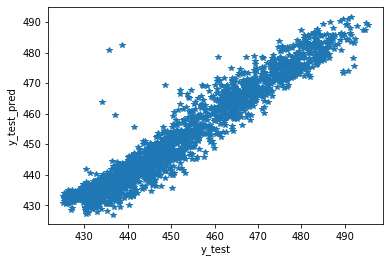

In [46]:
# predict y_test
y_test_scaled_pred = model.predict(X_test_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred)

plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [47]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, y_test_pred))

R2: 0.928840090508217
